#Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

#Business problem
to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install pingouin
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


In [81]:
data=pd.read_csv('avocado.csv')

In [82]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#Feature Engineering

I have average sales and total volume i can find total sales with it

In [83]:
data['Total Sales']=data['AveragePrice']*data['Total Volume']

We have three columns that have different type of plu total avacado sale we can find from this the total amount of avacado was sold

In [84]:
data['4046']=data['4046'].astype(float)

In [85]:
data['Total Avacado Sold']=data['4046']+	data['4225']+data['4770']

In [120]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [87]:
def convert(x):
    if x<=1.10:
        return 0   #Low price
    elif x<=2.20:
        return 1 #average price
    elif x<=3.30:
        return 2 #high price

the average price have almost have approx 240 unique values and total rows in data are 18249 the means average price is discrete value so i will convert it into three categories like low price,average price,high price

In [88]:
data['AveragePrice']=data['AveragePrice'].apply(convert)

#EDA

In [122]:
data.isna().sum()

store_id              0
Date                  0
AveragePrice          0
Total Volume          0
4046                  0
4225                  0
4770                  0
Total Bags            0
Small Bags            0
Large Bags            0
XLarge Bags           0
type                  0
year                  0
region                0
Total Sales           0
Total Avacado Sold    0
Month                 0
day                   0
dtype: int64

Dont have any null values

In [123]:
data.describe()

,store_id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Total Sales,Total Avacado Sold,Month,day
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,0.779002,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,9.279484e+05,6.110027e+05,6.177215,15.662612
std,15.481045,0.492252,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.686048e+06,2.517799e+06,3.534130,8.776281
min,0.000000,0.000000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.344504e+02,2.000000e+00,1.000000,1.000000
25%,10.000000,0.000000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.716418e+04,4.972720e+03,3.000000,8.000000
50%,24.000000,1.000000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.395298e+05,5.819536e+04,6.000000,16.000000
75%,38.000000,1.000000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,5.141914e+05,3.078016e+05,9.000000,23.000000
max,52.000000,2.000000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,5.437991e+07,4.473616e+07,12.000000,31.000000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   store_id            18249 non-null  int64         
 1   Date                18249 non-null  datetime64[ns]
 2   AveragePrice        18249 non-null  int64         
 3   Total Volume        18249 non-null  float64       
 4   4046                18249 non-null  float64       
 5   4225                18249 non-null  float64       
 6   4770                18249 non-null  float64       
 7   Total Bags          18249 non-null  float64       
 8   Small Bags          18249 non-null  float64       
 9   Large Bags          18249 non-null  float64       
 10  XLarge Bags         18249 non-null  float64       
 11  type                18249 non-null  object        
 12  year                18249 non-null  int64         
 13  region              18249 non-null  object    

In [125]:
data=data.rename(columns={'Unnamed: 0':'store_id'})

the unnamed is a store id so i am renaming it

In [93]:
#data.drop('Date',axis=1,inplace=True)

In [126]:
data.head()

,store_id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Sales,Total Avacado Sold,Month,day
0,0,2015-12-27,1,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,55539.75,12,27
1,1,2015-12-20,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,45371.42,12,20
2,2,2015-12-13,0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,110074.87,12,13
3,3,2015-12-06,0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,73180.99,12,6
4,4,2015-11-29,1,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,44855.65,11,29


#Checking how many unique values i have

In [127]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [96]:
data['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [97]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [98]:
from statsmodels.stats.proportion import proportions_ztest

In [128]:
count_col=['type','year','region','Month']

#Univariate Analysis

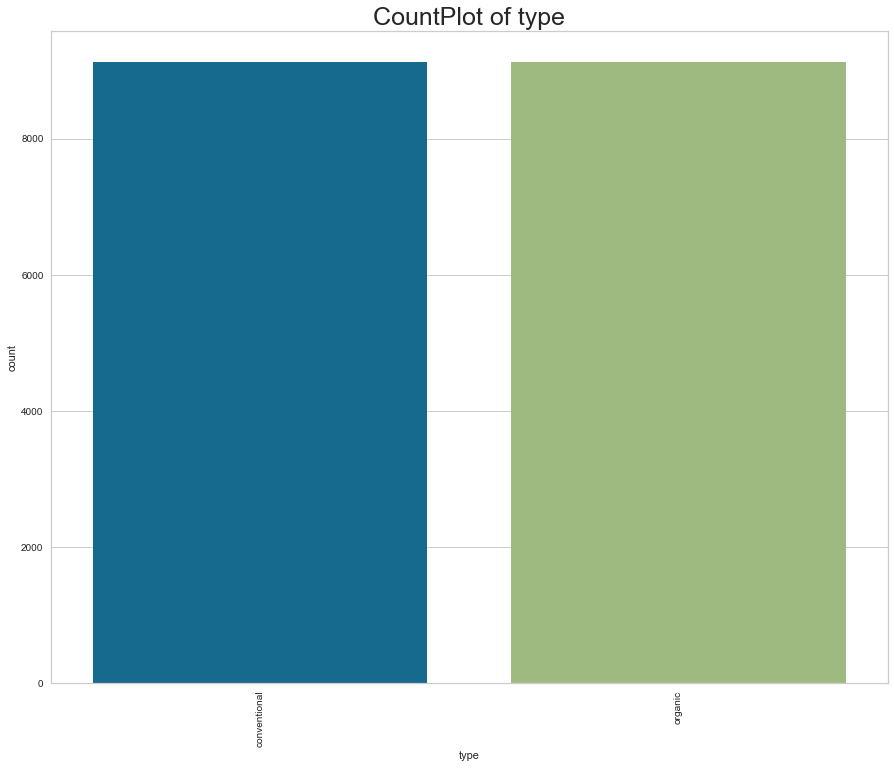

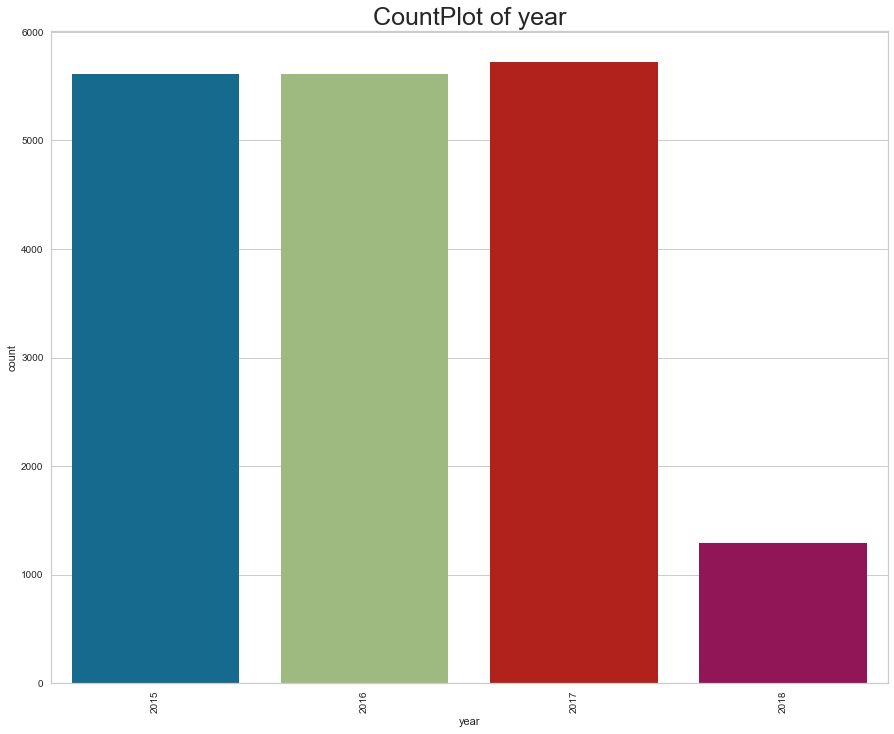

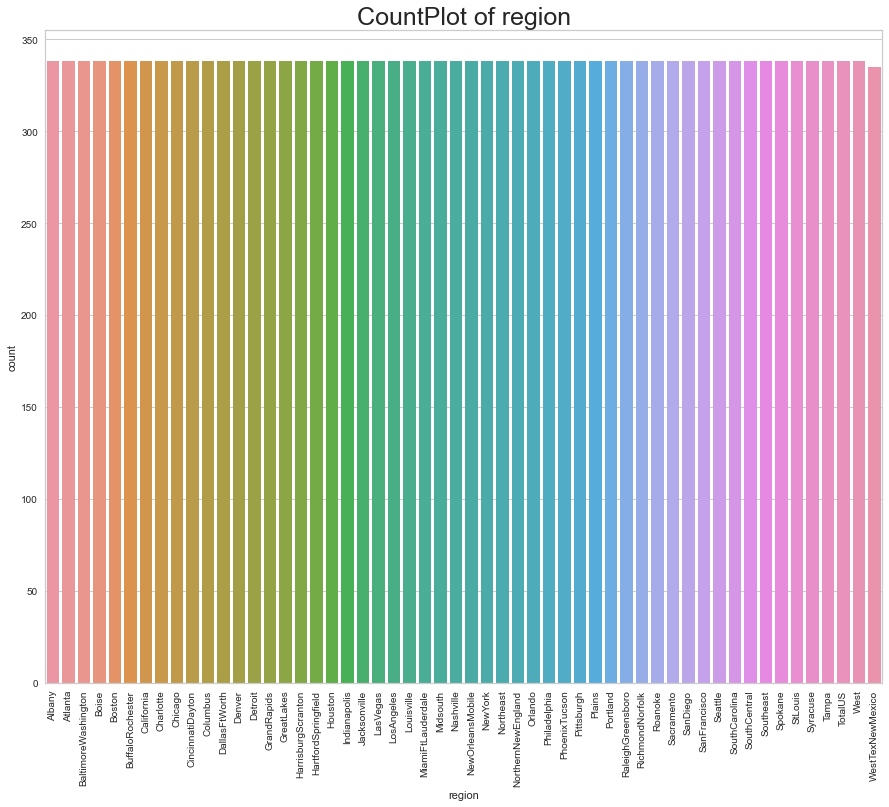

KeyError: 'Month'

<Figure size 1080x864 with 0 Axes>

In [101]:
for i in range(0,len(count_col)):
    plt.figure(figsize=(15,12))
    sns.countplot(data[count_col[i]])
    plt.xticks(rotation=90)
    plt.title(f"CountPlot of {count_col[i]}",fontsize=25)
    plt.show()

#Observation
1-from type column both level are equal 'conventional', 'organic' mean people like both of them

2-from year i can say year 2018 people did not had avacado as compare to other

3-from month we can see people use to have avacado more in first month and less in 9 and 6 month

In [103]:
data_col=['AveragePrice', 'Total Volume', '4046','4225','4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']

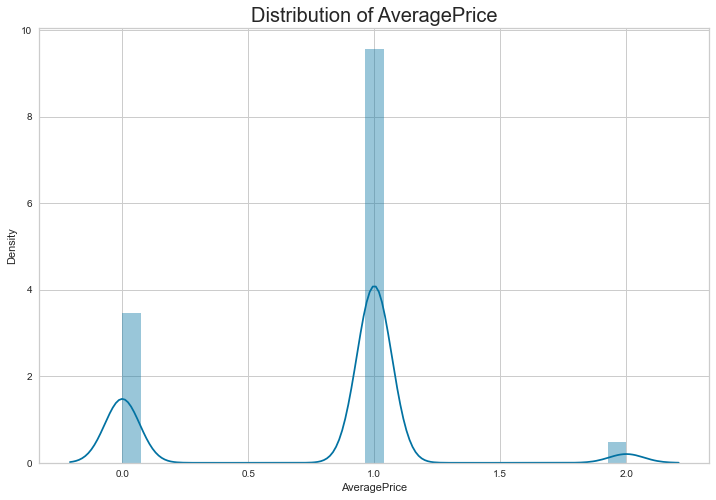

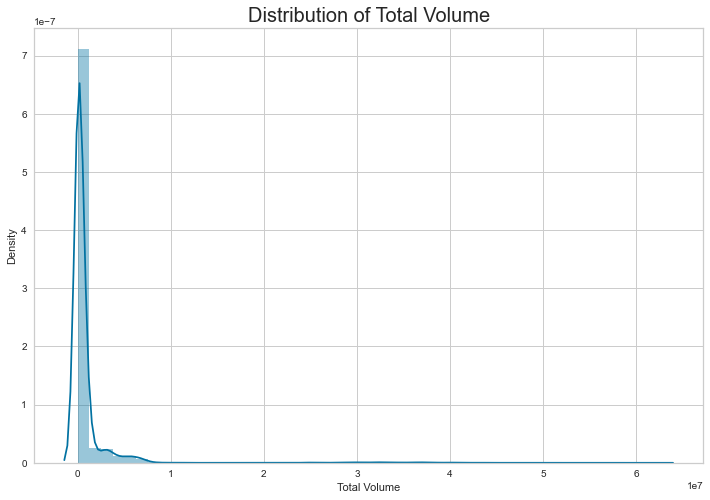

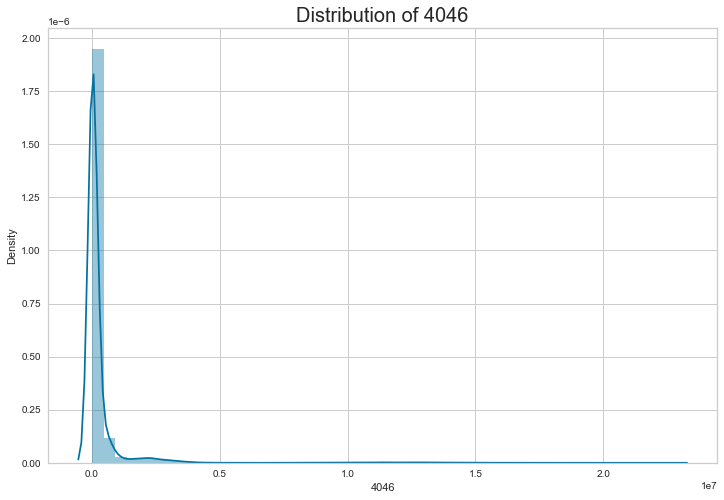

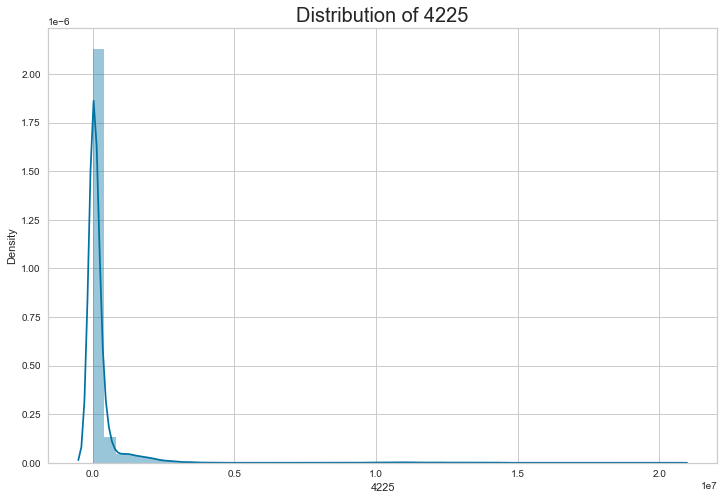

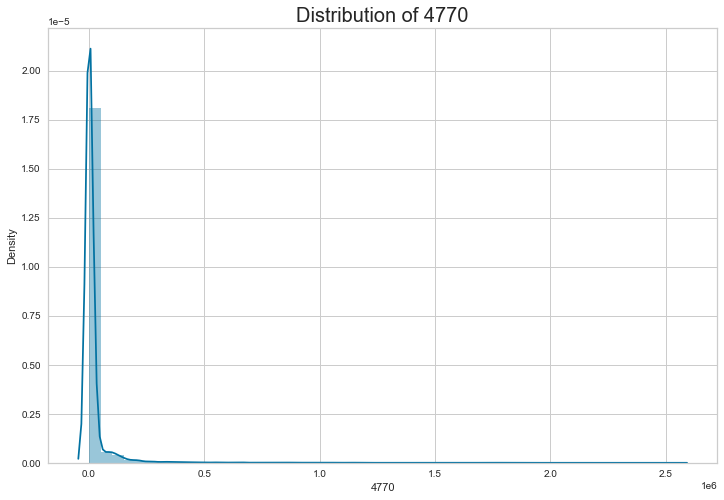

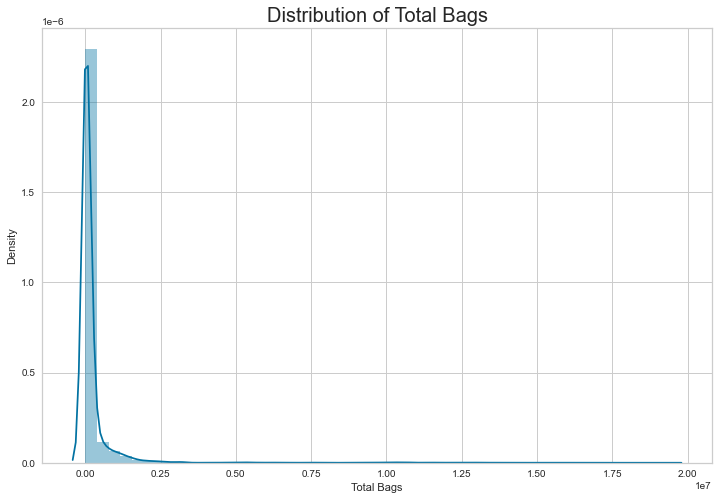

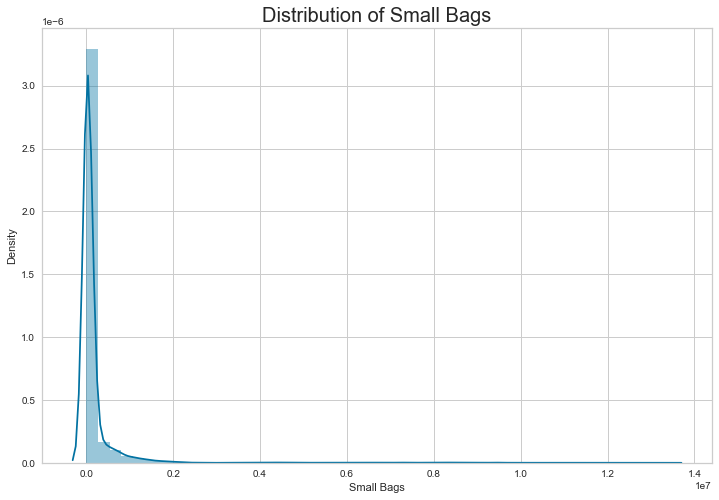

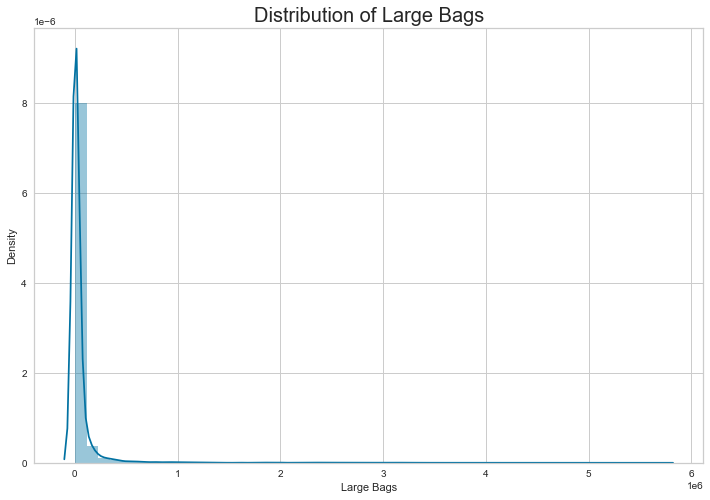

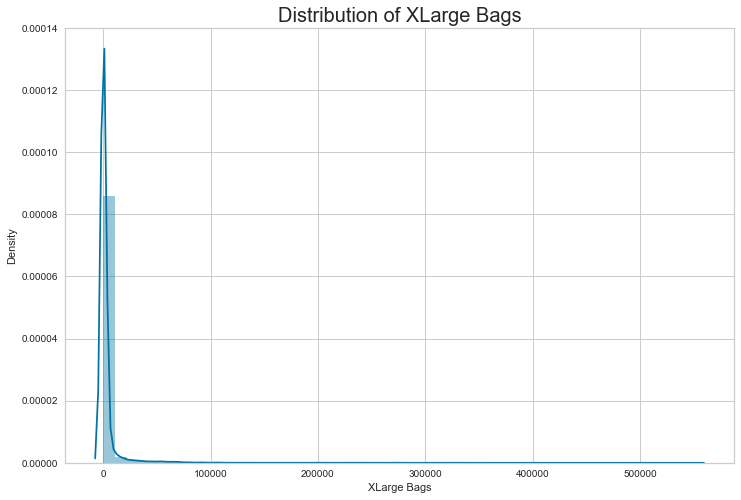

In [104]:
for i in range(0,len(data_col)):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data_col[i]])
    plt.title(f"Distribution of {data_col[i]}",fontsize=20)
    plt.show()

#Observation
the price column is having right skewed curve and all the other columns are power law distributed

#PDF plot

In [105]:
col=['AveragePrice','Total Sales', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']

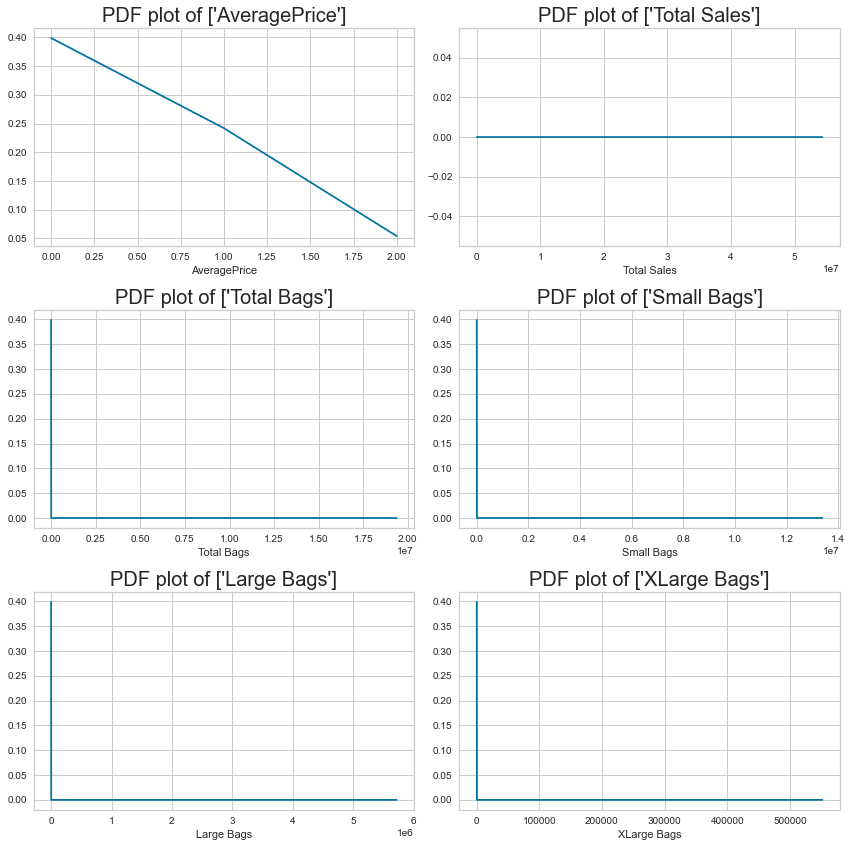

In [107]:
from scipy.stats import norm
plt.figure(figsize=(12,35))
for i in range(0,len(col)):
    plt.subplot(9,2,i+1)

    sns.lineplot(x=data[col[i]],y=norm.pdf(data[col[i]]))
    plt.title(f"PDF plot of {[col[i]]}",fontsize=20)
    plt.tight_layout()

By seeing the average price PDF i can tell how much percentage of data lies under some values and all other columns are not having norm distribution

#CDF Plot

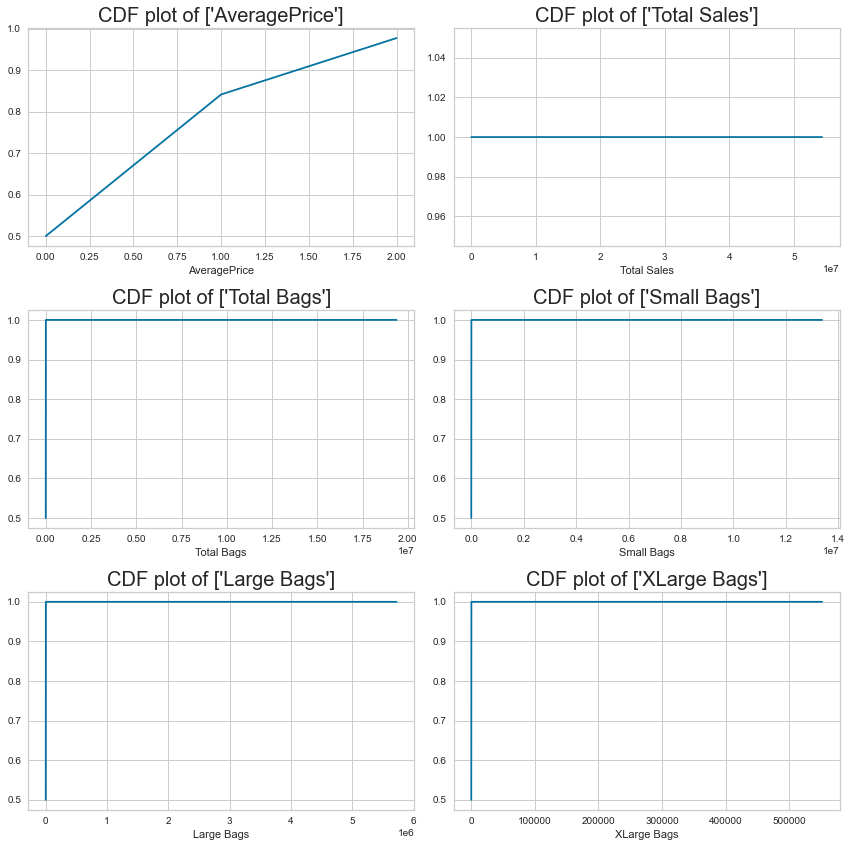

In [108]:
plt.figure(figsize=(12,35))
for i in range(0,len(col)):
    plt.subplot(9,2,i+1)

    sns.lineplot(x=data[col[i]],y=norm.cdf(data[col[i]]))
    plt.title(f"CDF plot of {[col[i]]}",fontsize=20)
    plt.tight_layout()

by seeing cdf of average price only 10% prices are greater then 1.50 and all the other columns are having uniform distribution and some are having other but not norm so i can not read them in CDF format

#Bivariate Analysis

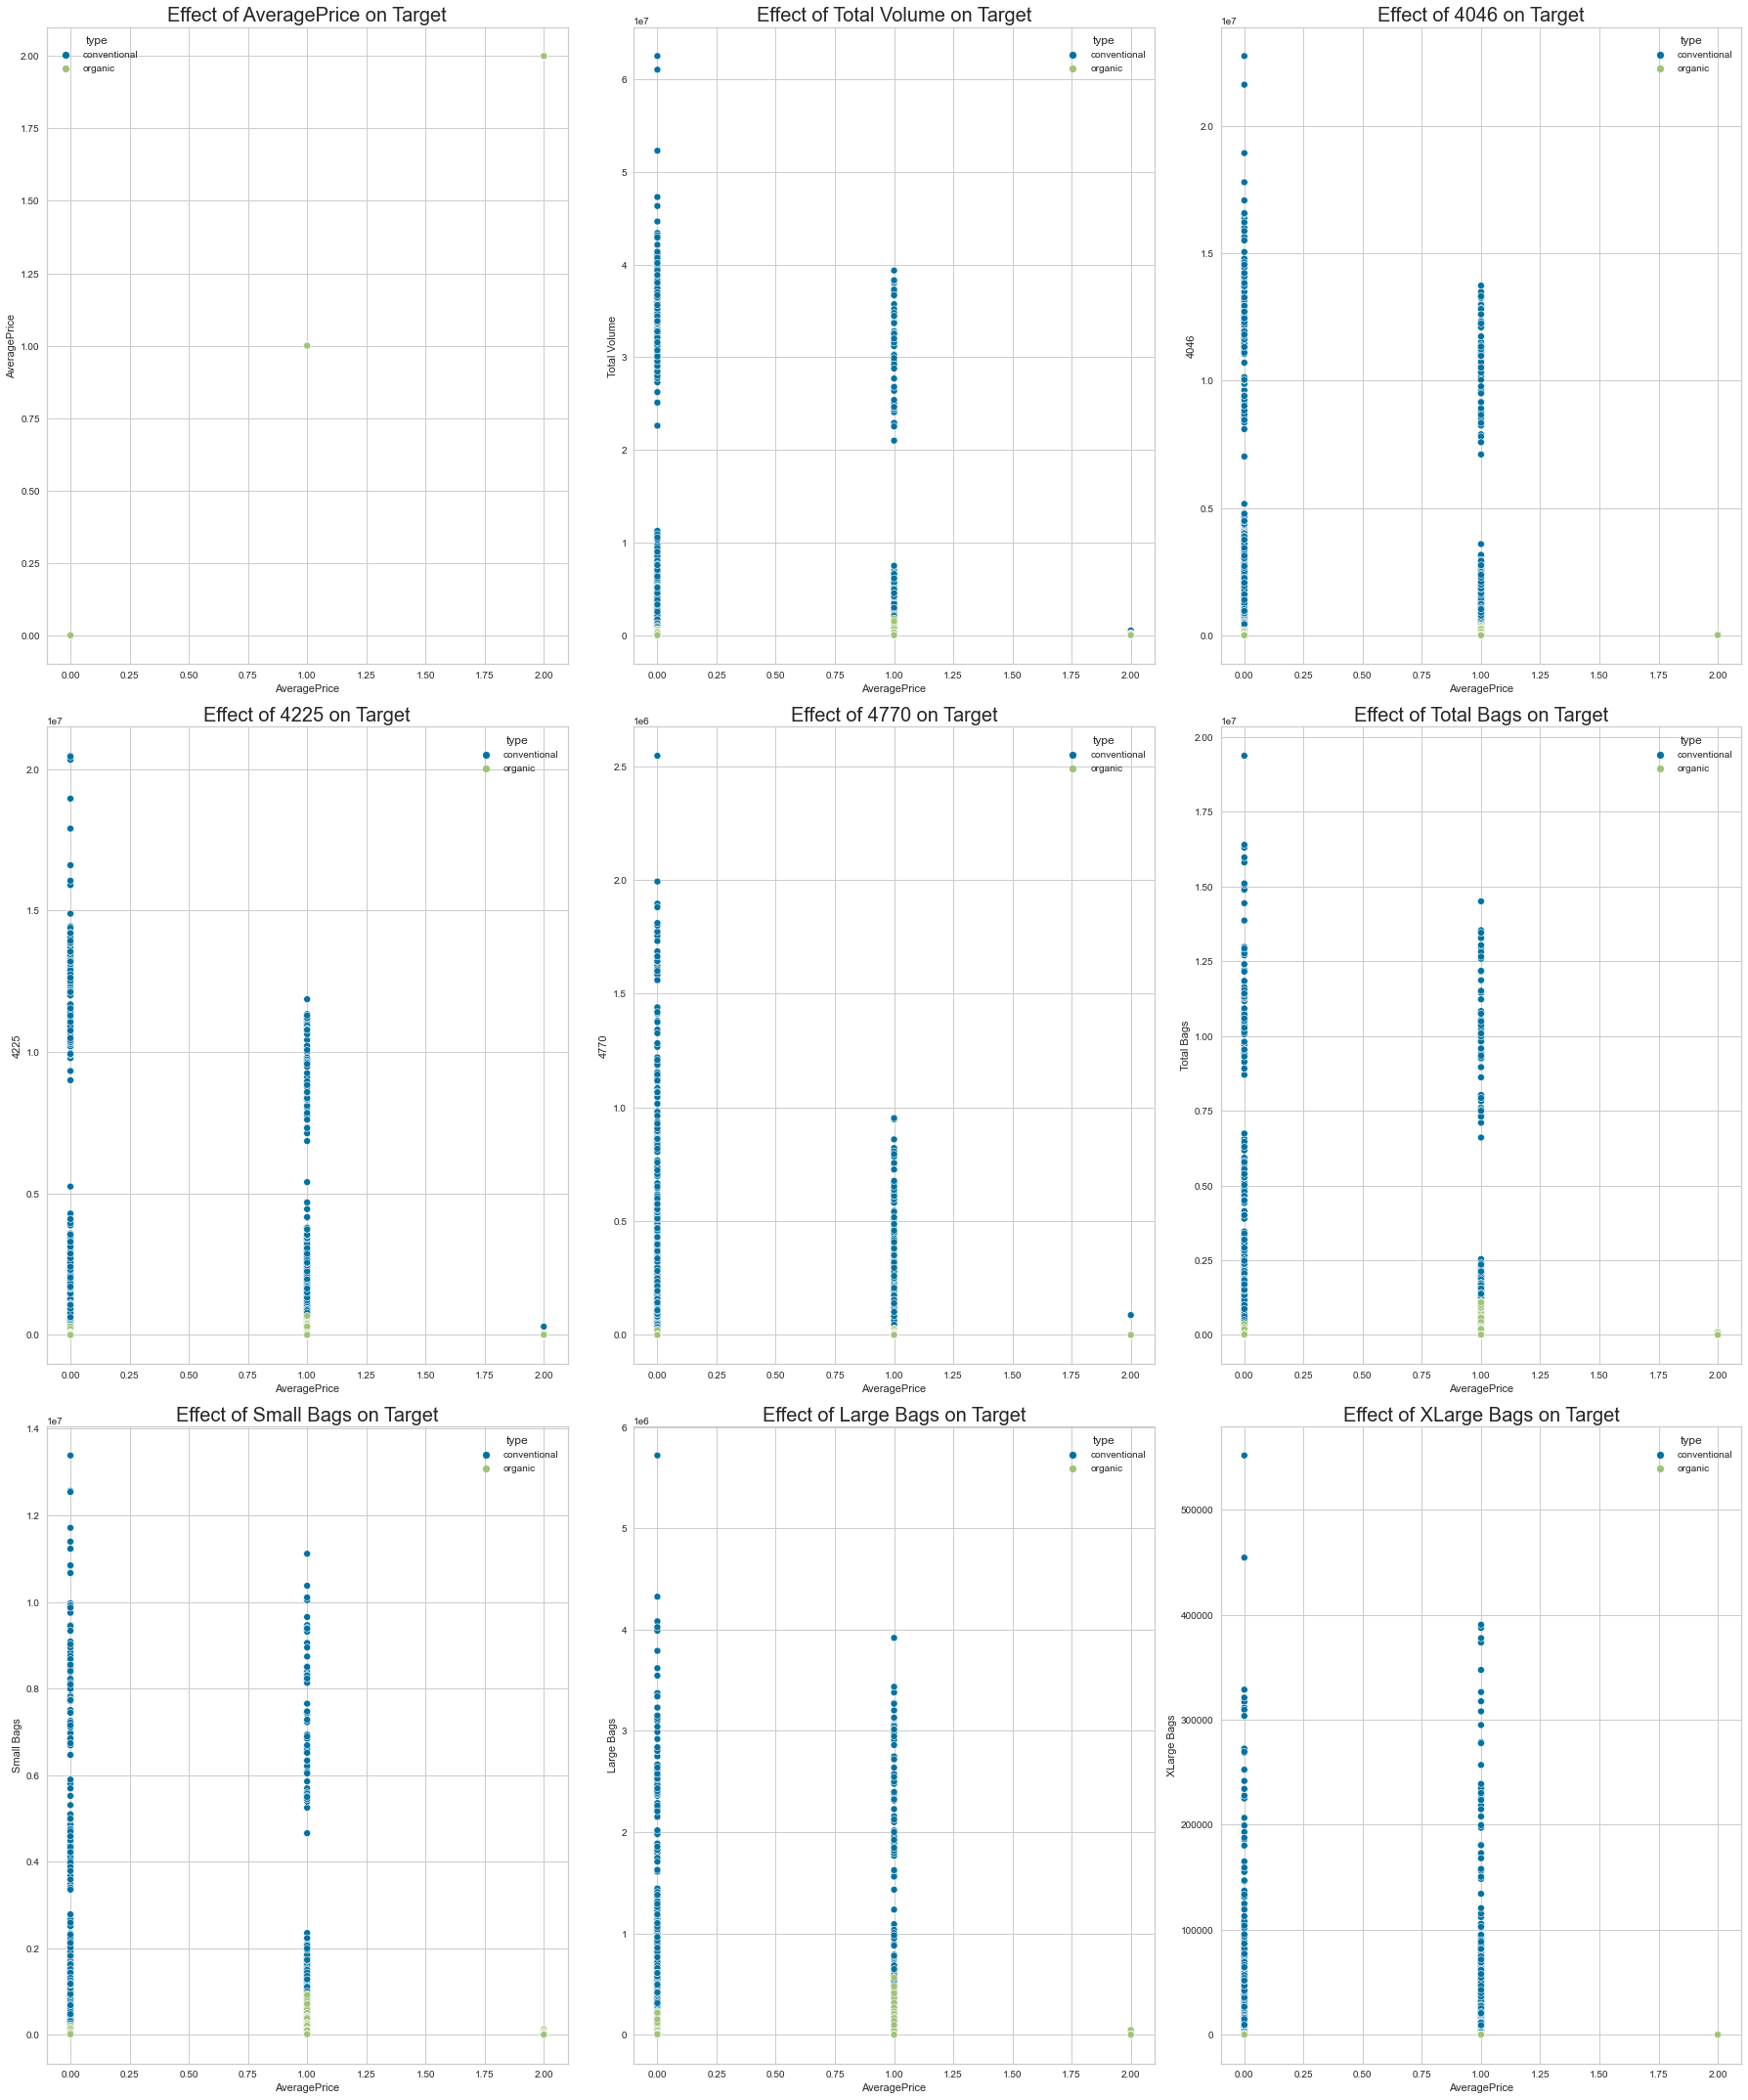

In [109]:
plt.figure(figsize=(25,30))
for i in range(0,len(data_col)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=data['AveragePrice'],y=data[data_col[i]],hue=data['type'])
    plt.title(f"Effect of {data_col[i]} on Target",fontsize=20)
    plt.tight_layout()

#Observation
lets take all the column i dont observed any linear relationship between any of the column but i can say that when the price is average the sales was high people use to bu extra bag and take avacado in extra volumne 

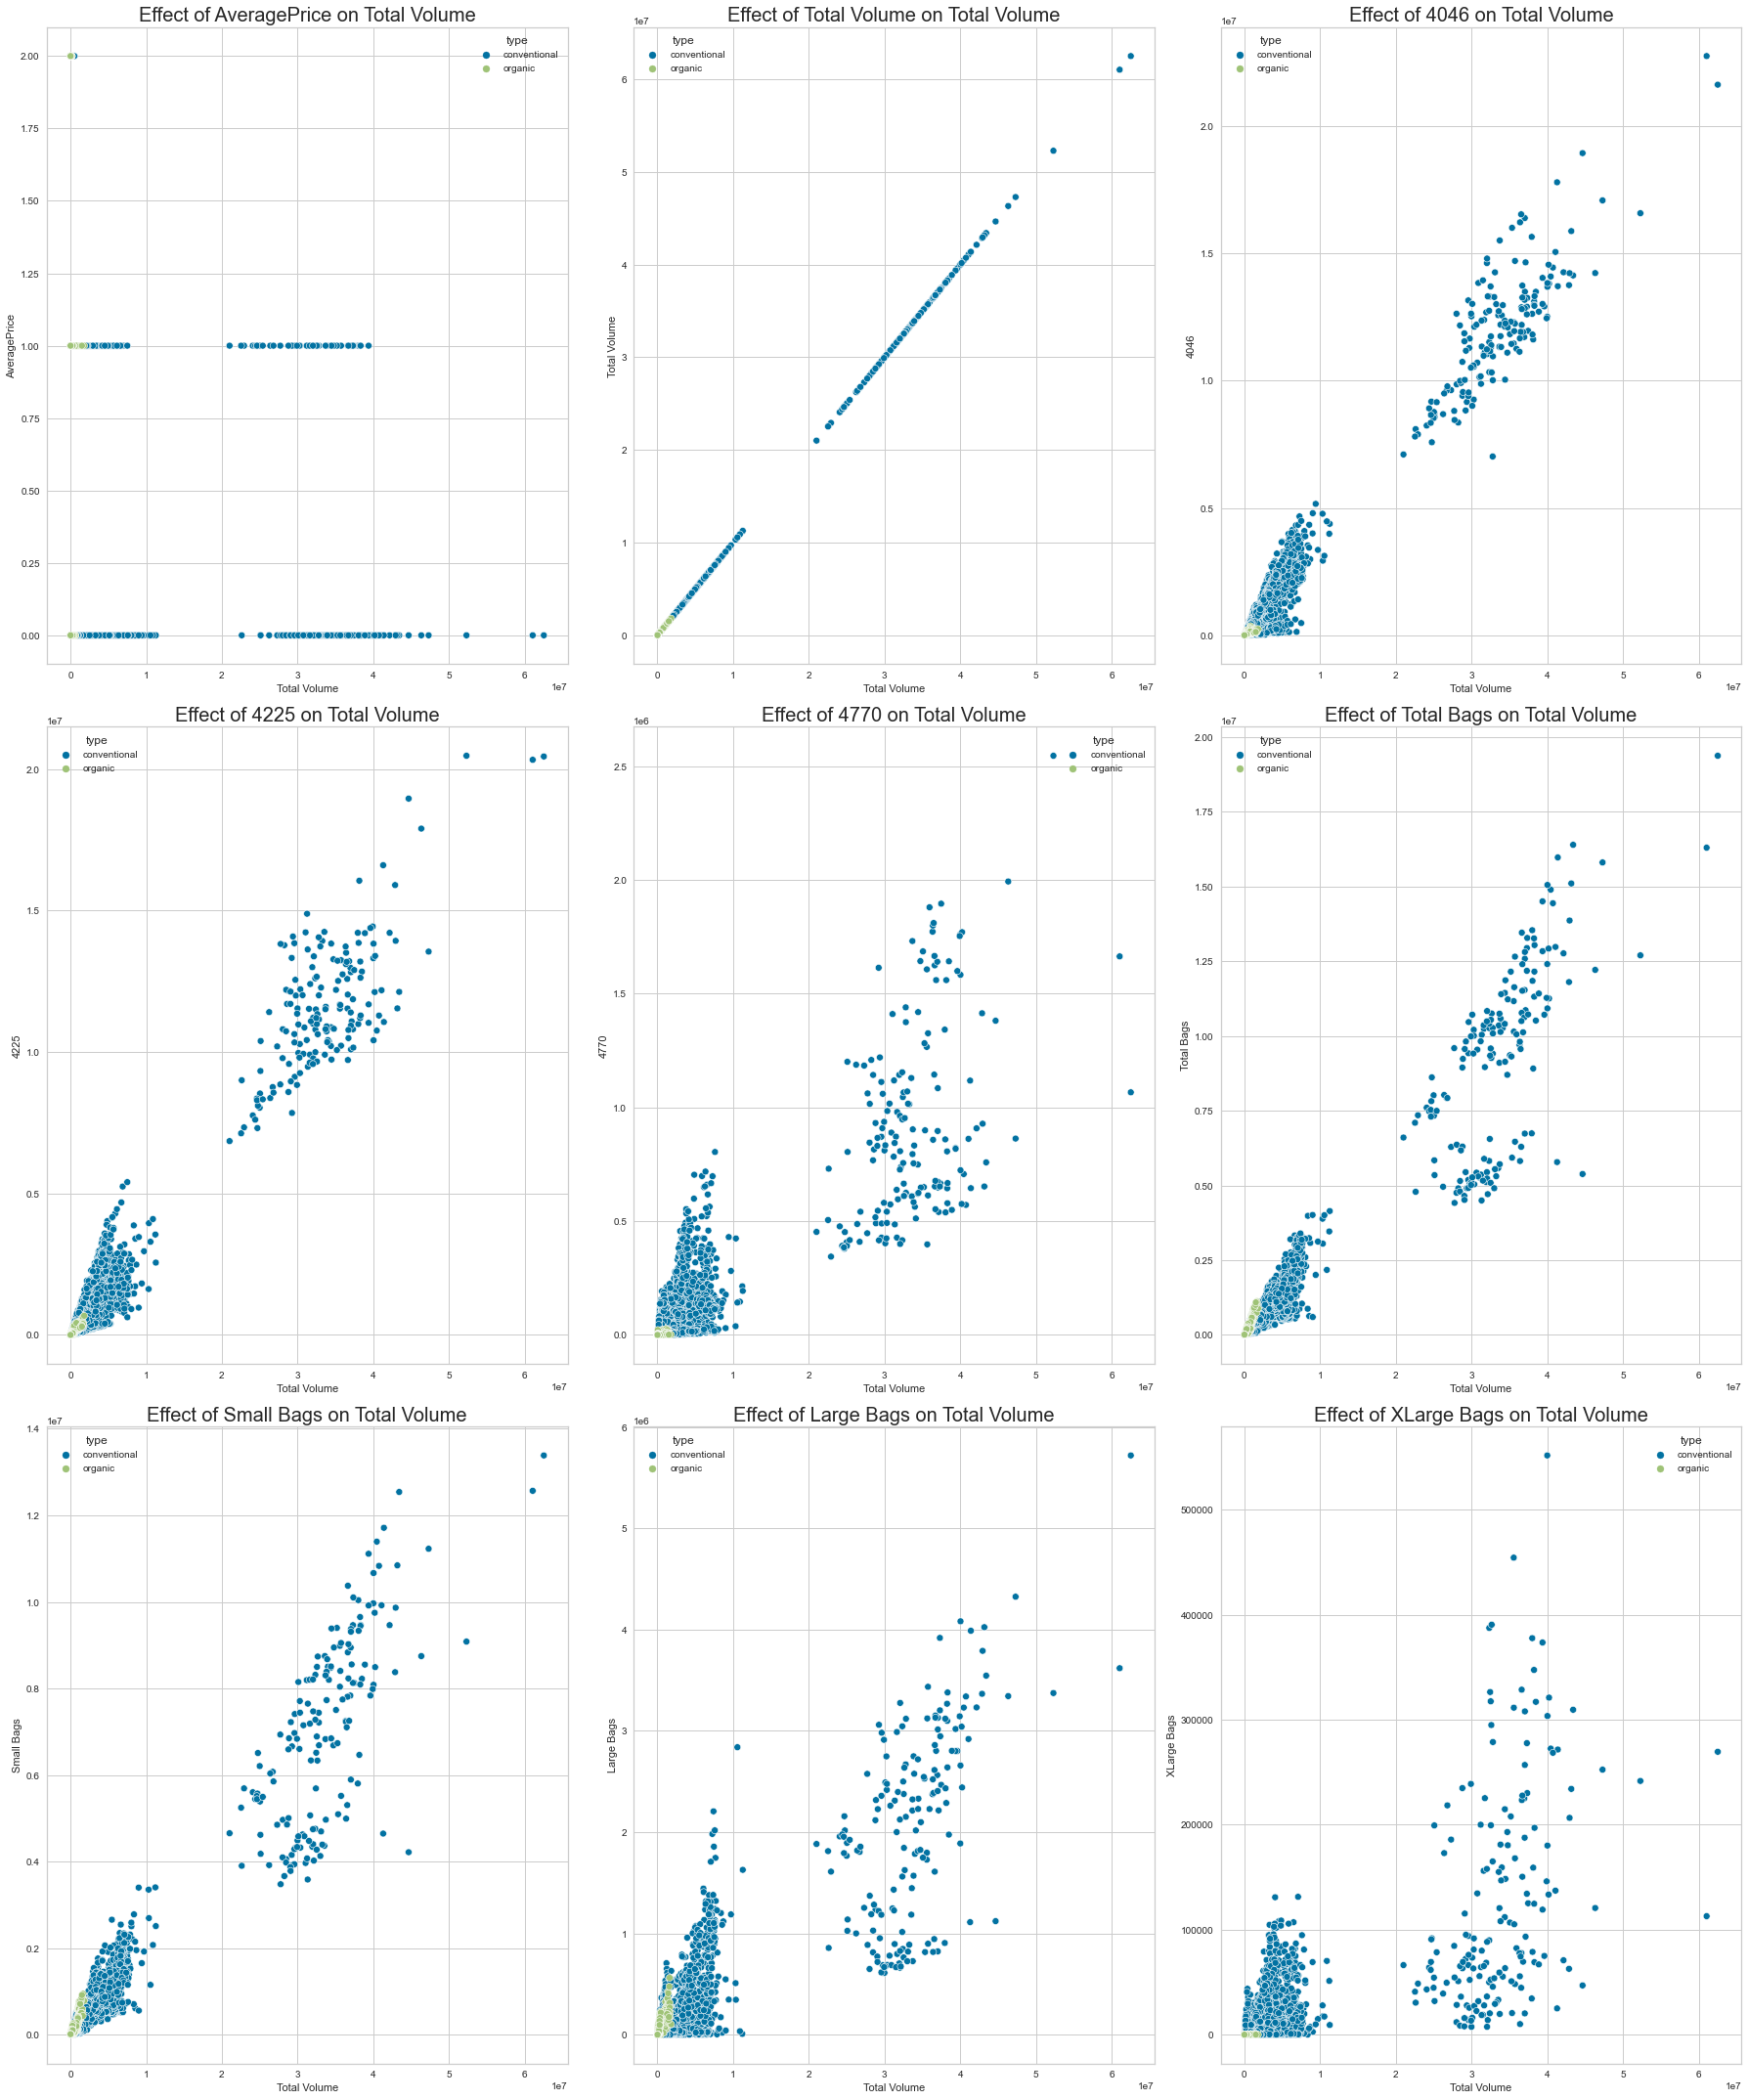

In [110]:
plt.figure(figsize=(25,30))
for i in range(0,len(data_col)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=data['Total Volume'],y=data[data_col[i]],hue=data['type'])
    plt.title(f"Effect of {data_col[i]} on Total Volume",fontsize=20)
    plt.tight_layout()

As i can see as the volume is increasing all the features is also increasing like samll bag size or large bag size

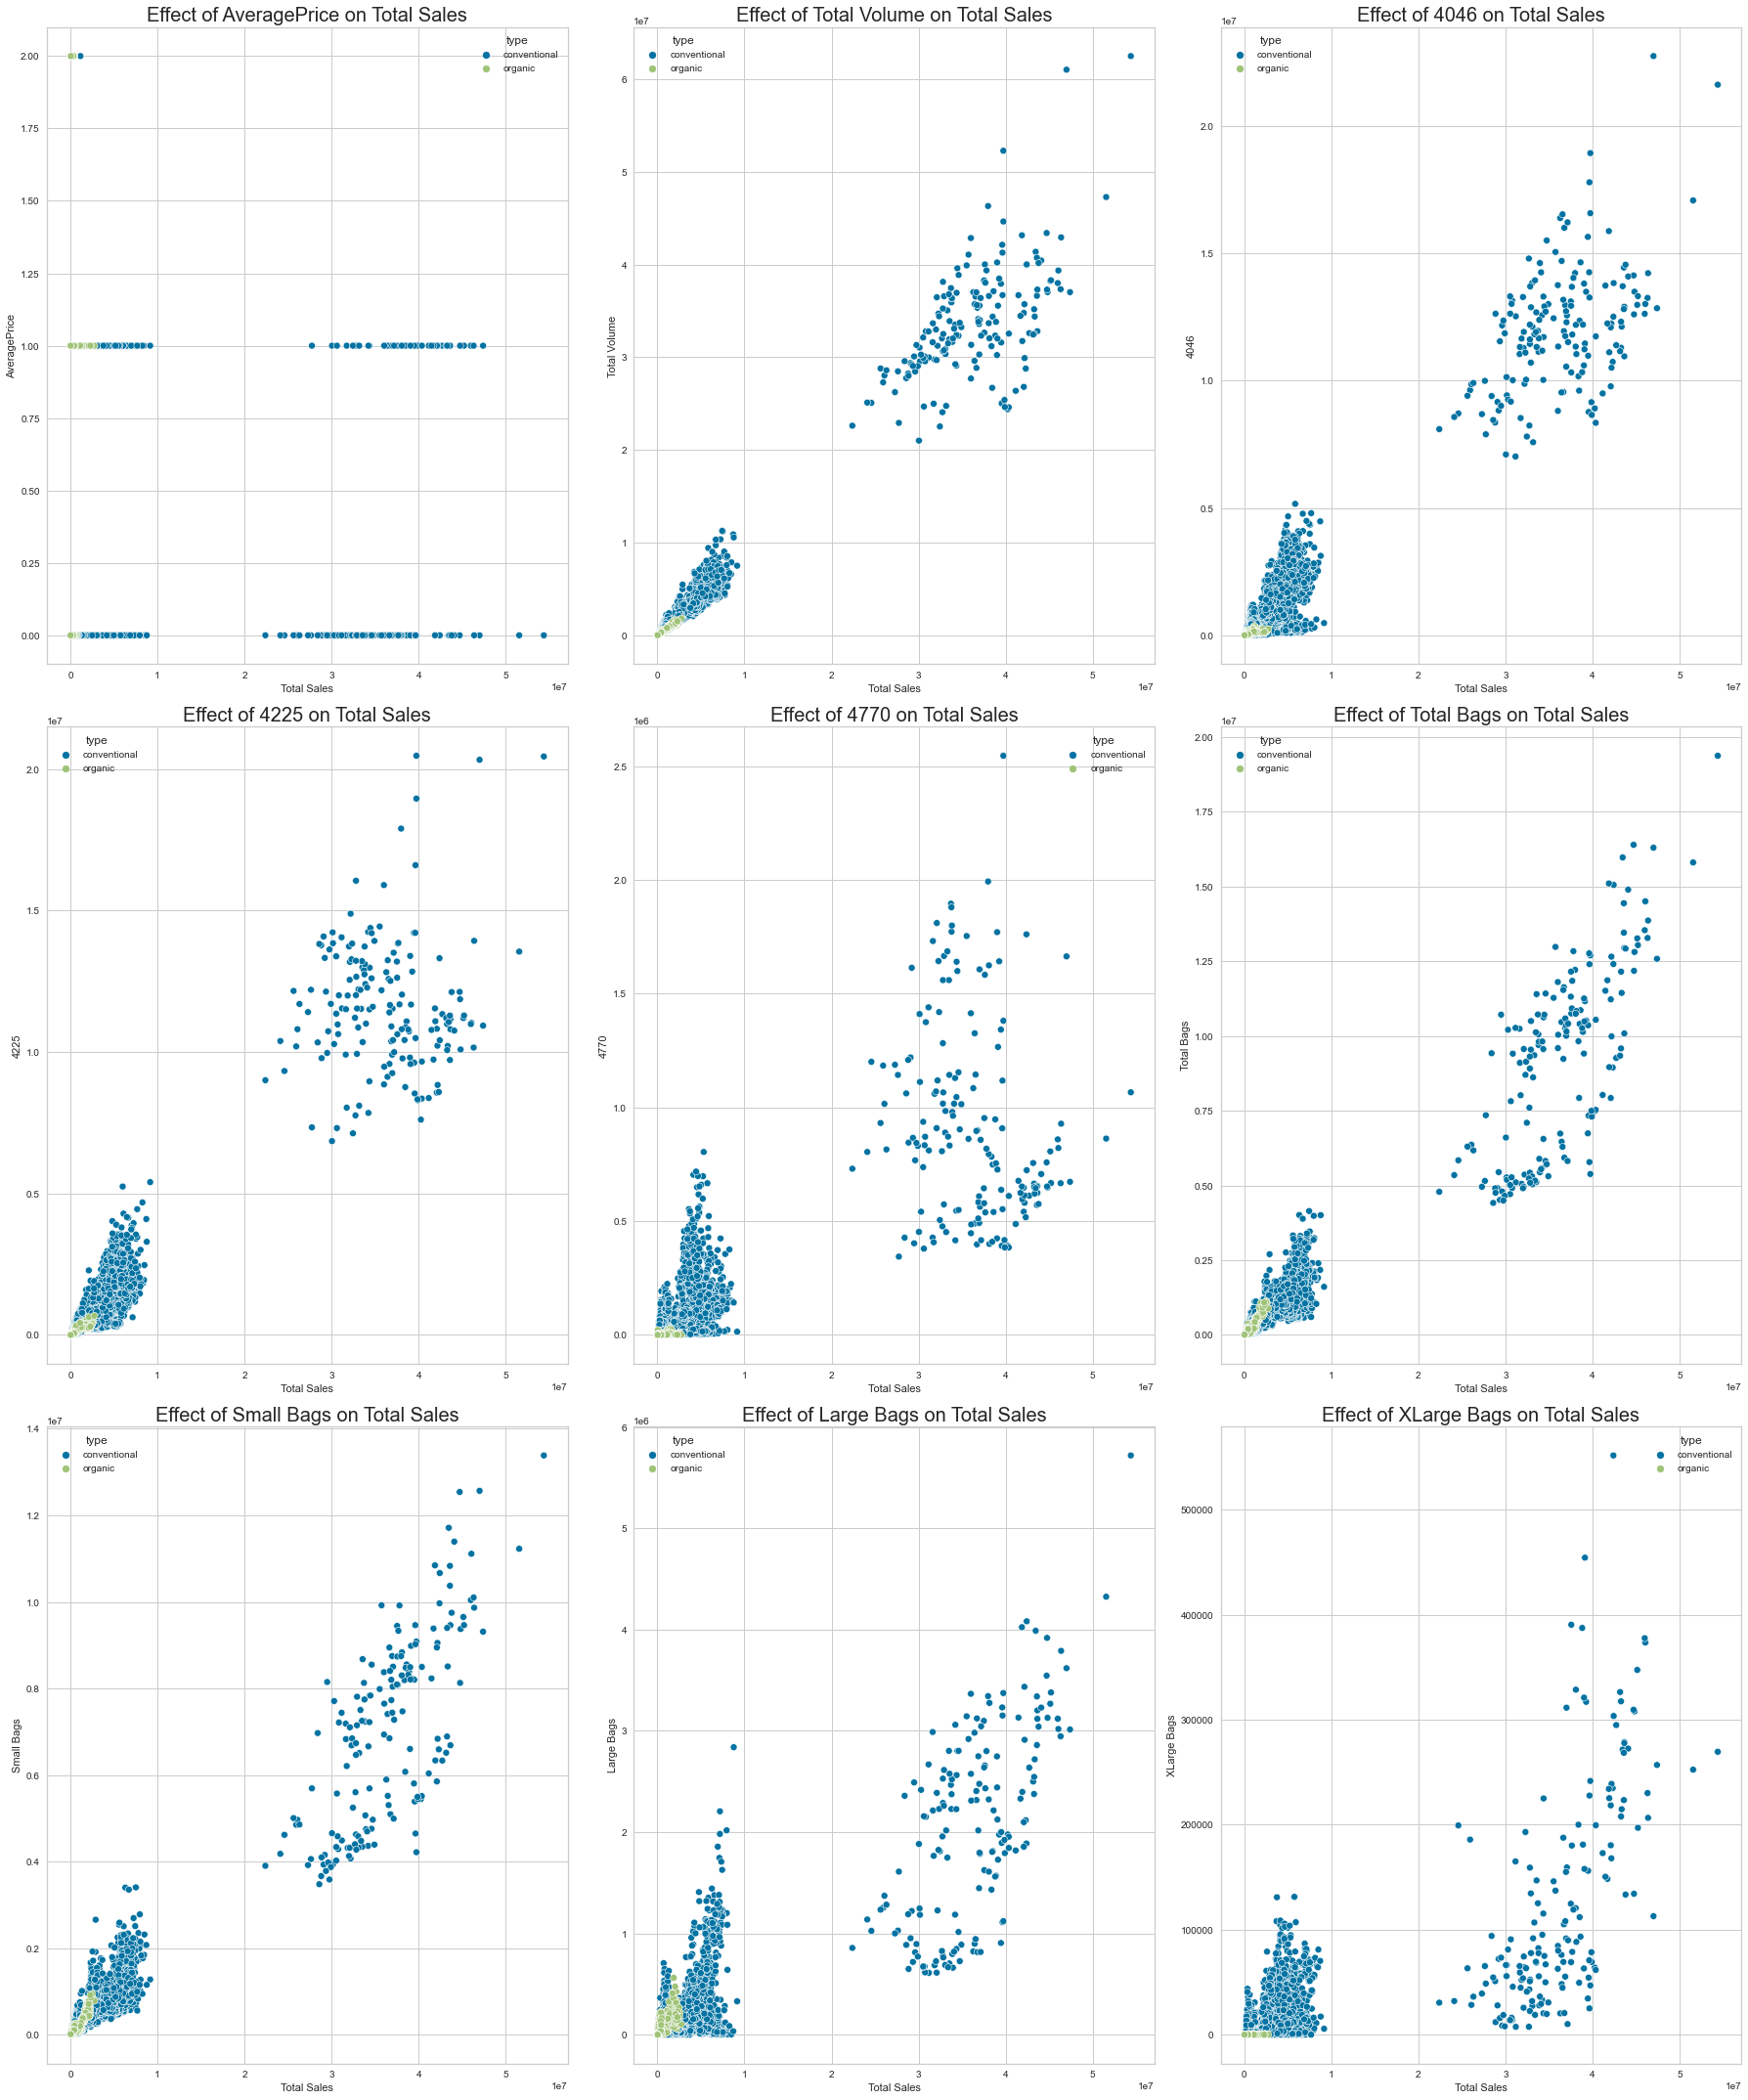

In [111]:
plt.figure(figsize=(25,30))
for i in range(0,len(data_col)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=data['Total Sales'],y=data[data_col[i]],hue=data['type'])
    plt.title(f"Effect of {data_col[i]} on Total Sales",fontsize=20)
    plt.tight_layout()

As the total sales is increasing all the features of our data is increasing and what i observed that when the price is low people want to buy avacado more

In [112]:
data.columns

Index(['store_id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Total Sales', 'Total Avacado Sold'],
      dtype='object')

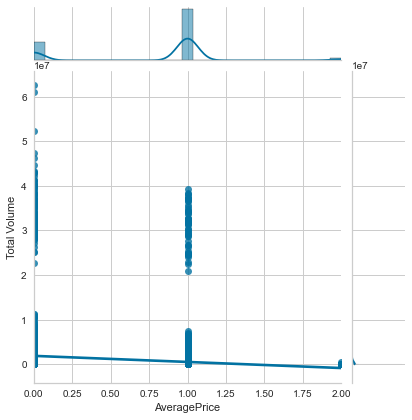

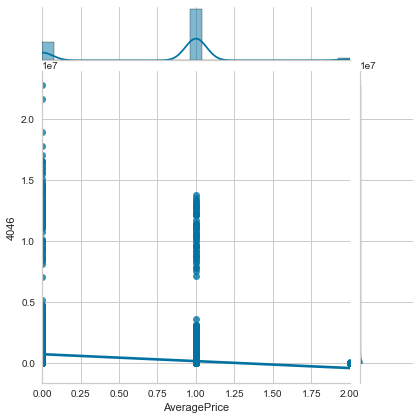

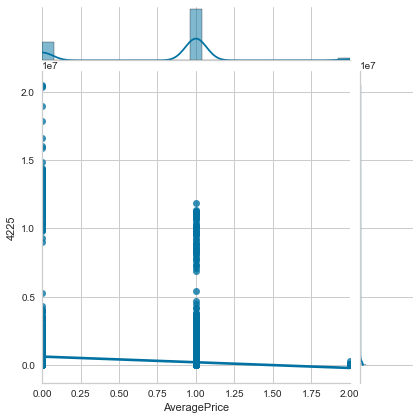

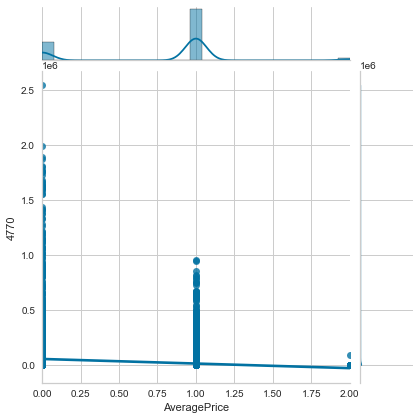

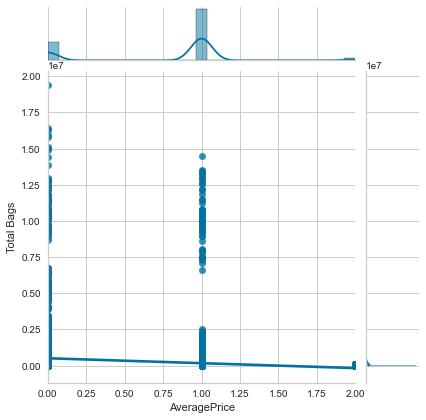

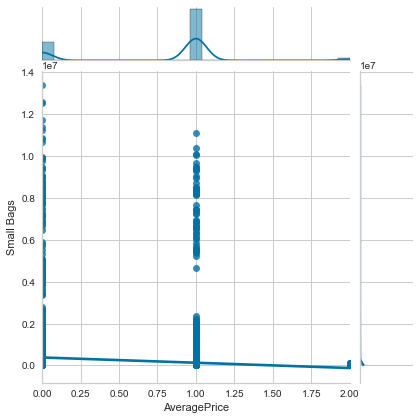

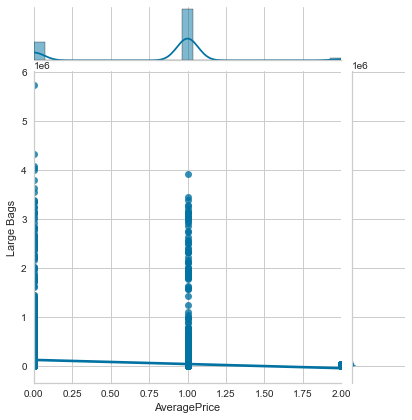

In [113]:
sns.jointplot(x='AveragePrice',y='Total Volume',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='4046',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='4225',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='4770',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='Total Bags',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='Small Bags',data=data,kind='reg')
sns.jointplot(x='AveragePrice',y='Large Bags',data=data,kind='reg')

#Observation 
different type of plots help os to find relationship of columns with target column but there is no suc good relationship but when price is less sale is high people wants to buy it at less price

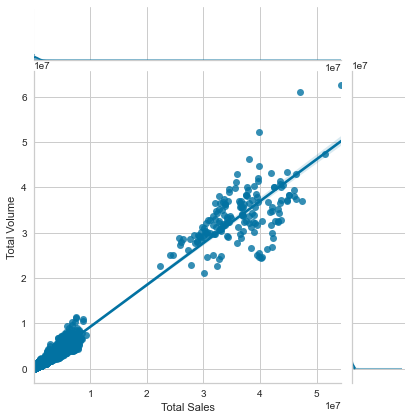

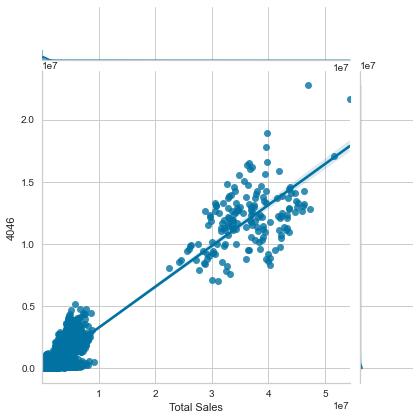

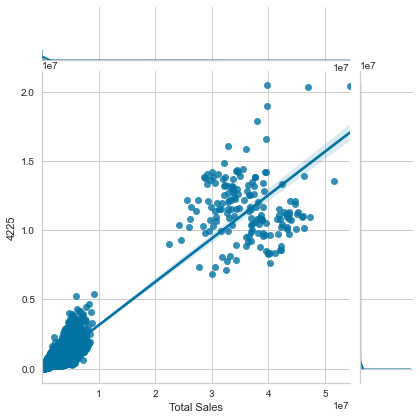

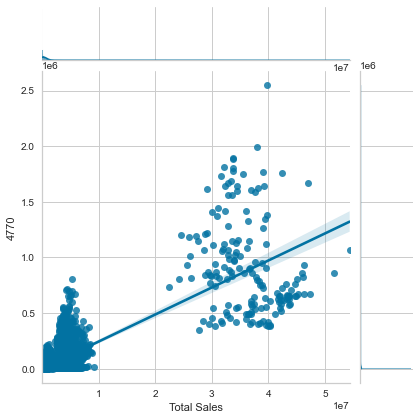

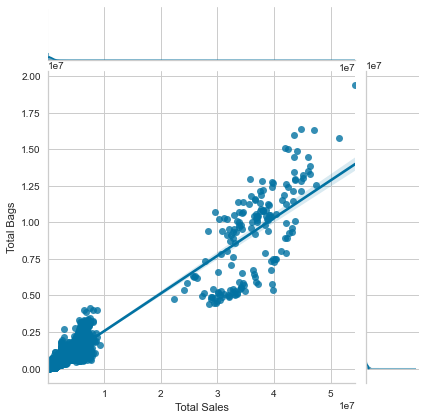

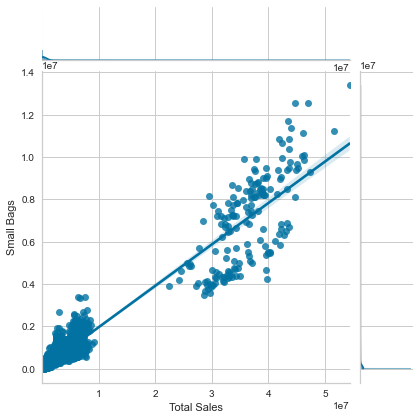

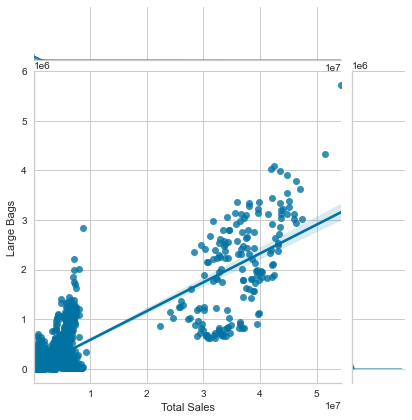

In [114]:
sns.jointplot(x='Total Sales',y='Total Volume',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='4046',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='4225',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='4770',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='Total Bags',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='Small Bags',data=data,kind='reg')
sns.jointplot(x='Total Sales',y='Large Bags',data=data,kind='reg')

Jointplot is showding us the linear relationship with total volume all the features have linear relationship with total sales

In [115]:
data_cov=data.loc[data['type']=='conventional'].set_index('Date')
data_org=data.loc[data['type']=='organic'].set_index('Date')

Text(0.5, 1.0, 'Avacado Prices')

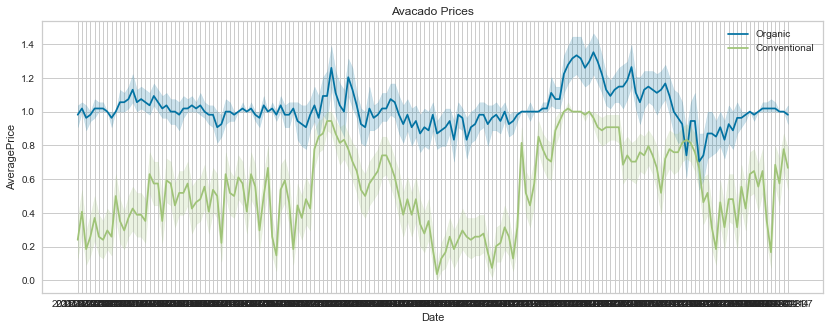

In [129]:
plt.figure(figsize=(14,5))
sns.lineplot(data=data_org['AveragePrice'],label='Organic')
sns.lineplot(data=data_cov['AveragePrice'],label='Conventional')
plt.xlabel("Date")
plt.title("Avacado Prices")

#From upper graph we can say organic has the mostly good sales as per time it is also increasing

Text(0.5, 1.0, 'Total Volume Sold')

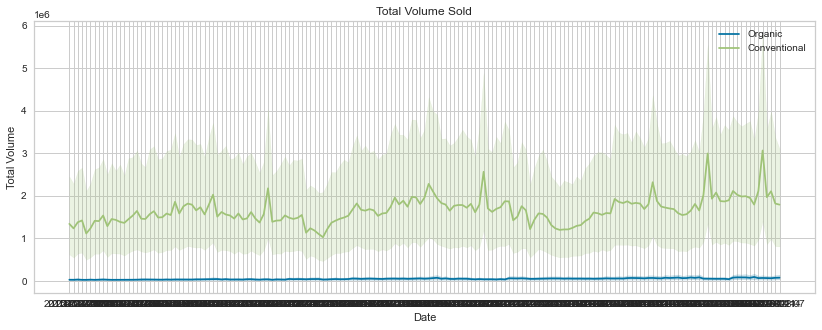

In [117]:
plt.figure(figsize=(14,5))
sns.lineplot(data=data_org['Total Volume'],label='Organic')
sns.lineplot(data=data_cov['Total Volume'],label='Conventional')
plt.xlabel("Date")
plt.title("Total Volume Sold")

#From Upper graph i can say in volume sale conventional is having good demand

Text(0.5, 1.0, 'Total Sales Sold')

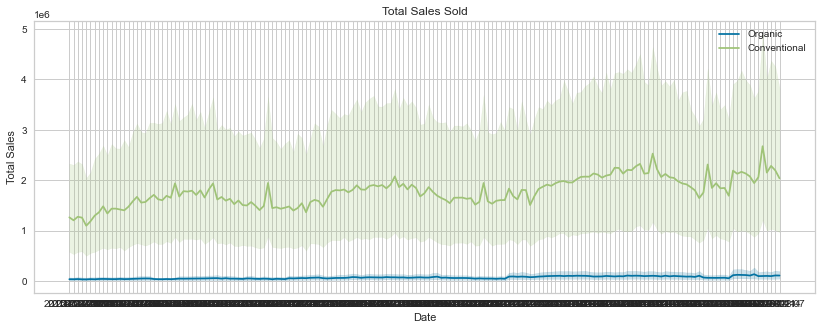

In [118]:
plt.figure(figsize=(14,5))
sns.lineplot(data=data_org['Total Sales'],label='Organic')
sns.lineplot(data=data_cov['Total Sales'],label='Conventional')
plt.xlabel("Date")
plt.title("Total Sales Sold")

Total sales for organic is very high as compare to conventional

Text(0.5, 1.0, 'Total sales per month')

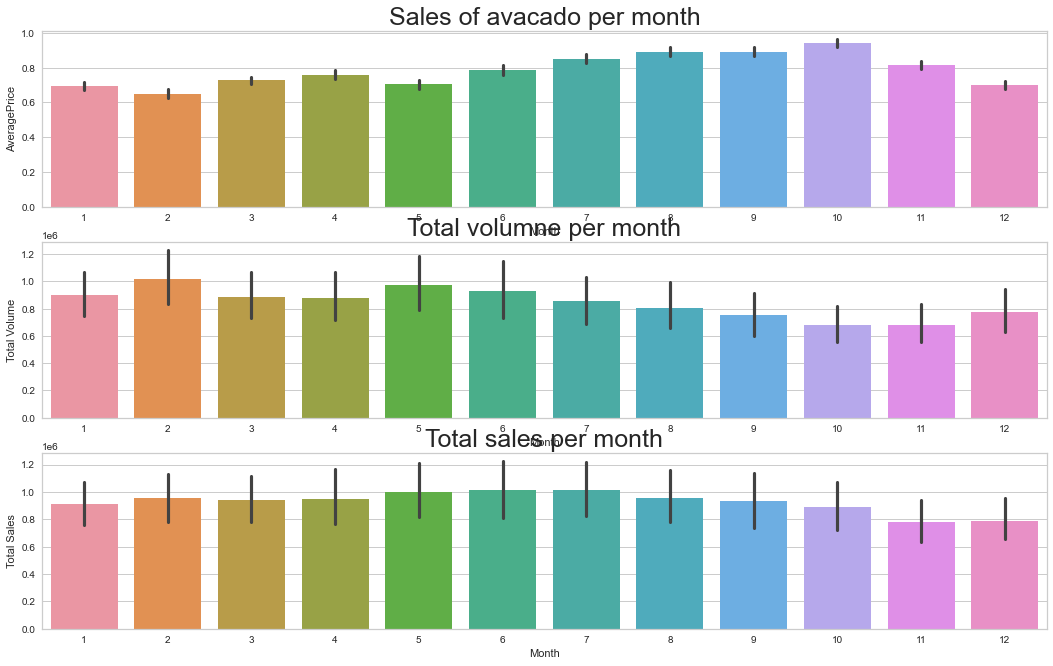

In [130]:
plt.figure(figsize=(18,11))
plt.subplot(3,1,1)
sns.barplot(x='Month',y='AveragePrice',data=data)
print('\n')
plt.title("Sales of avacado per month",fontsize=25)
plt.subplot(3,1,2)
sns.barplot(x='Month',y='Total Volume',data=data)
plt.title("Total volumne per month",fontsize=25)
plt.subplot(3,1,3)
sns.barplot(x='Month',y='Total Sales',data=data)
plt.title("Total sales per month",fontsize=25)

#Observation
1-The average price for avacado is high in 10th month and was less in 2nd month

2-the total volume of avacado was high in 2nd month and was less in 10 & 11 month

3-the total sale was high in 5,6,7 month and was less in 11th month

Text(0.5, 1.0, 'Total sales per year')

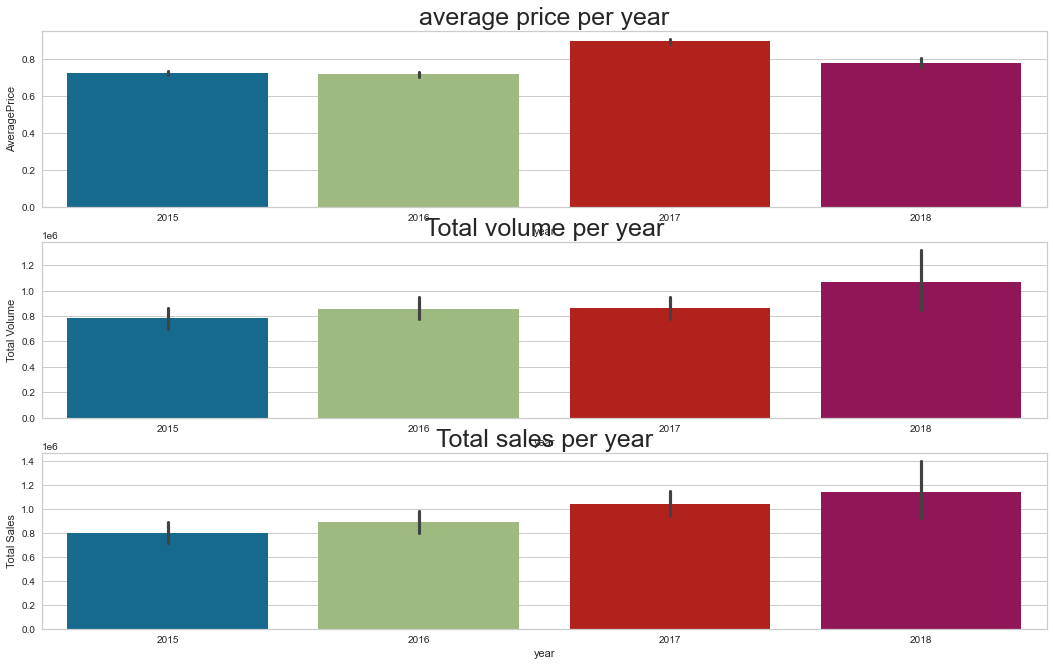

In [131]:
plt.figure(figsize=(18,11))
plt.subplot(3,1,1)
sns.barplot(x='year',y='AveragePrice',data=data)
plt.title("average price per year",fontsize=25)
plt.subplot(3,1,2)
sns.barplot(x='year',y='Total Volume',data=data)
plt.title("Total volume per year",fontsize=25)
plt.subplot(3,1,3)
sns.barplot(x='year',y='Total Sales',data=data)
plt.title("Total sales per year",fontsize=25)

#Observation
1-in 2017 price was high

2-In 2018 the volume was high

3-Total sales per per was high in 2018

In [132]:
data1=data.groupby('region')['Total Avacado Sold'].sum()
data1=data1.reset_index()
data1=data1.sort_values(by=('Total Avacado Sold'),ascending=False)

Text(0.5, 0, 'region')

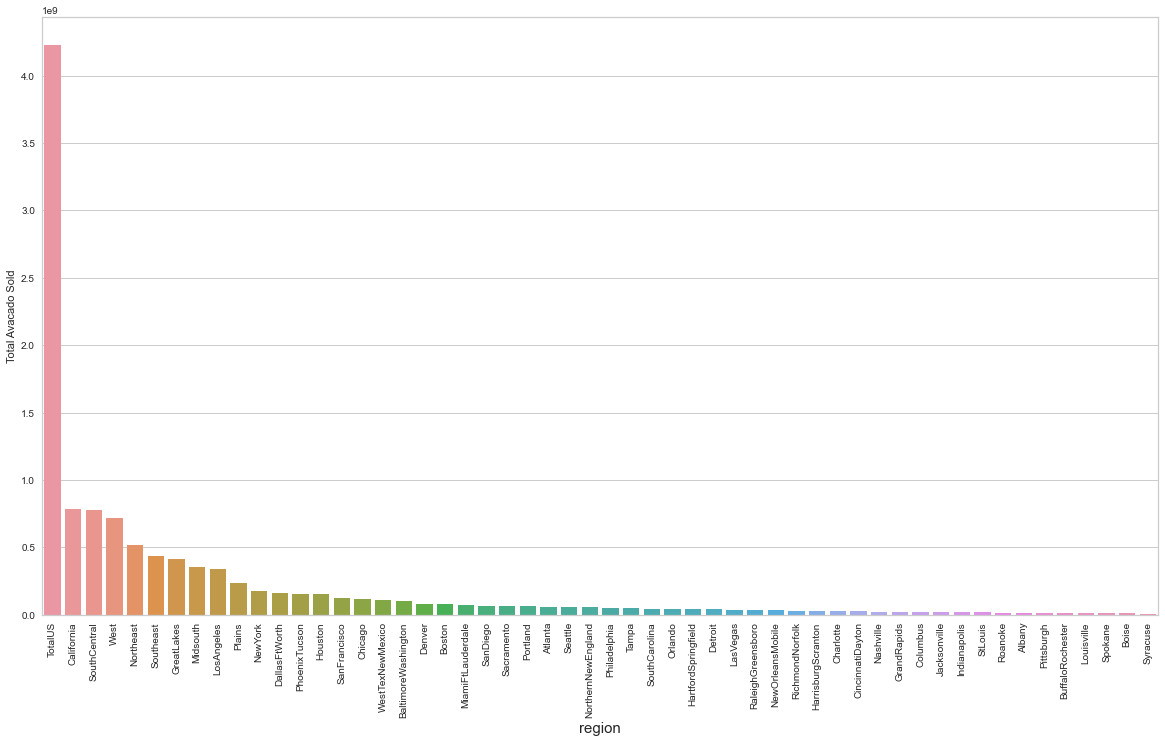

In [133]:
plt.figure(figsize=(20,11))
sns.barplot(x='region',y='Total Avacado Sold',data=data1)
plt.xticks(rotation=90)
plt.xlabel('region',fontsize=15)

#Observation
1-Totalus have the highest total avacado sales then callifornia

2-at least we have syracuse

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'

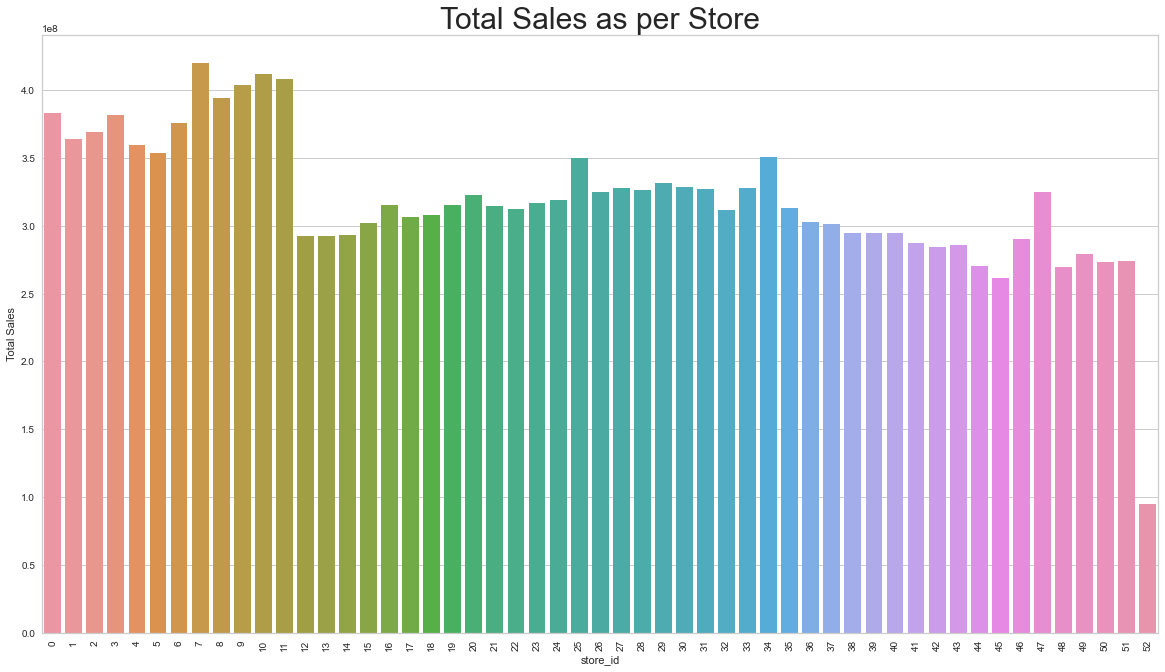

In [134]:
data2=data.groupby('store_id')['Total Sales'].sum()
data2=data2.reset_index()
data2=data2.sort_values(by=('Total Sales'),ascending=False)
plt.figure(figsize=(20,11))
sns.barplot(x='store_id',y='Total Sales',data=data2)
plt.title("Total Sales as per Store",fontsize=30)
plt.xticks(rotation=90)

#Obseravtion
1-The store no. 7 having the maximun sales

2-the store no.52 having the less sales

In [135]:
data.drop('Date',axis=1,inplace=True)

In [136]:
data

,store_id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Sales,Total Avacado Sold,Month,day
0,0,1,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,55539.75,12,27
1,1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,45371.42,12,20
2,2,0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,110074.87,12,13
3,3,0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,73180.99,12,6
4,4,1,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,44855.65,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,27831.9729,3576.16,2,4
18245,8,1,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,23748.5484,4623.20,1,28
18246,9,1,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,25743.8412,4372.65,1,21
18247,10,1,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,31276.0746,5235.68,1,14


In [137]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [139]:
def onehot_encoder(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [140]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [186]:
def preprocessing(df):
    df=df.copy()
    df['type']=df['type'].replace({'conventional':0,'organic':1})
    df['region']=le.fit_transform(df['region'])
    X=df.drop(['AveragePrice'],axis=1)
    y=df['AveragePrice']
    return X,y

In [187]:
X,y=preprocessing(data)

In [188]:
X

,store_id,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Sales,Total Avacado Sold,Month,day
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,85434.7046,55539.75,12,27
1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,74083.9230,45371.42,12,20
2,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,109944.8046,110074.87,12,13
3,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,85311.5220,73180.99,12,6
4,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,65330.6880,44855.65,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,27831.9729,3576.16,2,4
18245,8,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,23748.5484,4623.20,1,28
18246,9,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,25743.8412,4372.65,1,21
18247,10,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,31276.0746,5235.68,1,14


In [170]:
X['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

<AxesSubplot:>

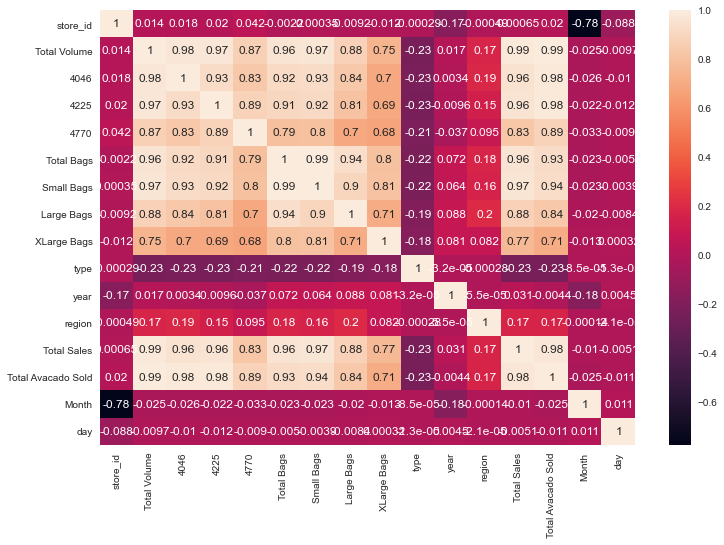

In [171]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

#to many columns that have correlation with each other

In [182]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [189]:
corr_features=correlation(X,0.9)
len(set(corr_features))

7

We have total 6 columns that are highly correlated to each other

#I will drop these columns because it lead to multicollinearity and my model will trained on the bases of these 5 columns because they are interacting with each other so its better to drop them

In [190]:
X.columns

Index(['store_id', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Total Sales', 'Total Avacado Sold', 'Month', 'day'],
      dtype='object')

In [191]:
X=X.drop(['XLarge Bags',
 'Total Bags',
 'Total Volume',
 '4225','Small Bags','4046'],axis=1)
X

,store_id,4770,Large Bags,type,year,region,Total Sales,Total Avacado Sold,Month,day
0,0,48.16,93.25,0,2015,0,85434.7046,55539.75,12,27
1,1,58.33,97.49,0,2015,0,74083.9230,45371.42,12,20
2,2,130.50,103.14,0,2015,0,109944.8046,110074.87,12,13
3,3,72.58,133.76,0,2015,0,85311.5220,73180.99,12,6
4,4,75.78,197.69,0,2015,0,65330.6880,44855.65,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,7,0.00,431.85,1,2018,53,27831.9729,3576.16,2,4
18245,8,0.00,324.80,1,2018,53,23748.5484,4623.20,1,28
18246,9,727.94,42.31,1,2018,53,25743.8412,4372.65,1,21
18247,10,727.01,50.00,1,2018,53,31276.0746,5235.68,1,14


In [192]:
corr_features

{'4046',
 '4225',
 'Large Bags',
 'Small Bags',
 'Total Avacado Sold',
 'Total Bags',
 'Total Sales'}

#Checking outliers

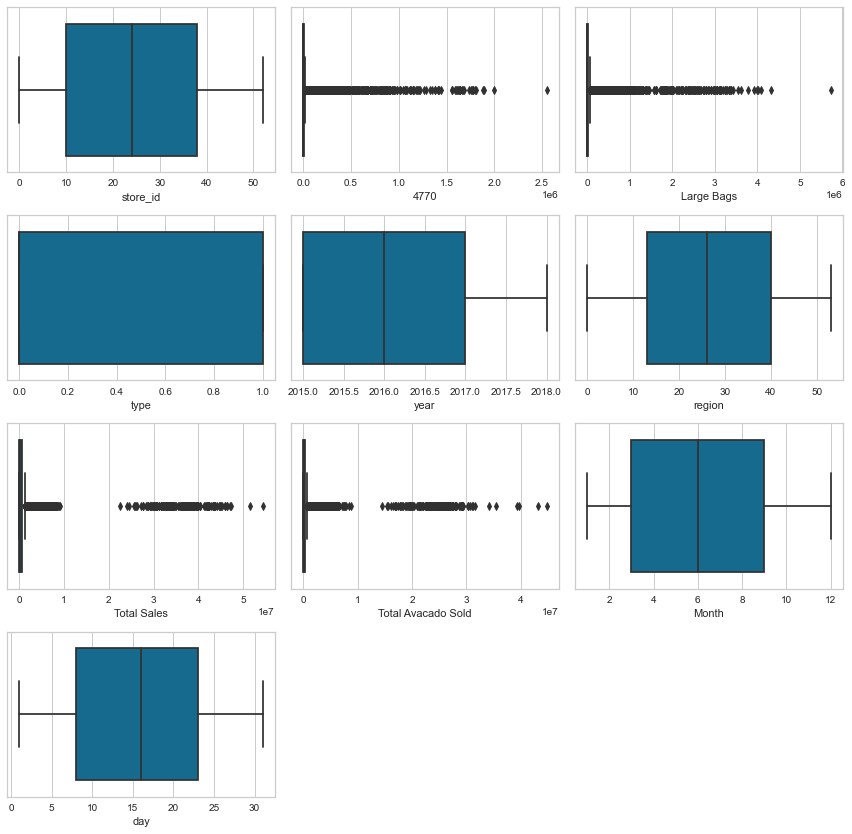

In [193]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
    plt.subplot(7,3,i+1)
    sns.boxplot(X[X_out[i]])
    plt.tight_layout()

Yes i have some outliers lets drop them

#Removing Outliers by percentile method

In [194]:
for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col]<=percentile[0]]=percentile[0]
    X[col][X[col]>=percentile[1]]=percentile[1]

#After removing outliers

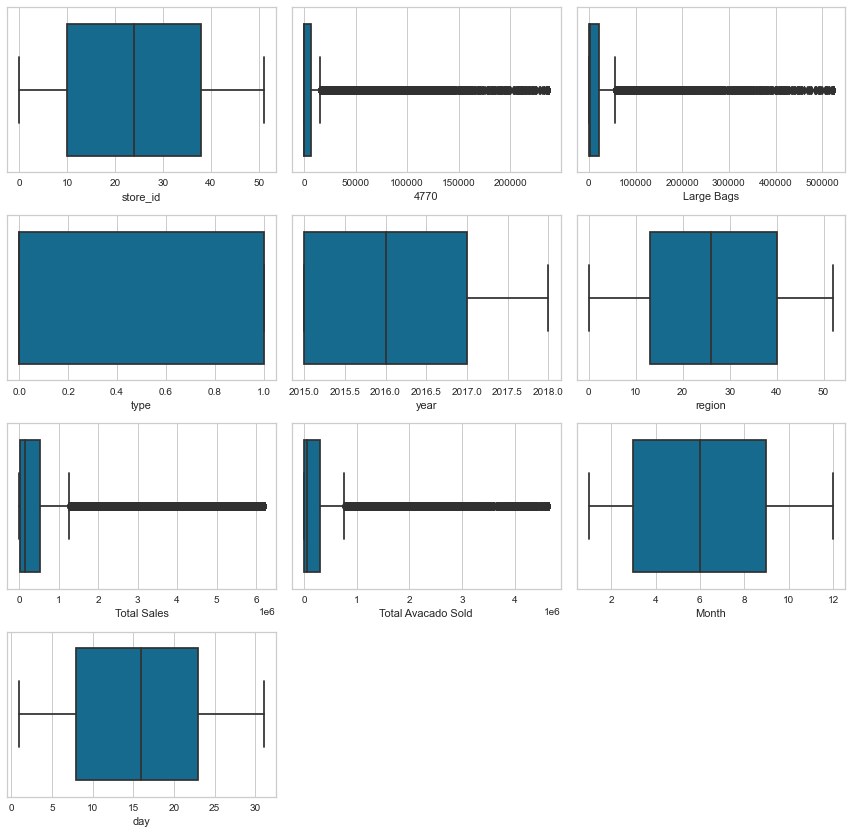

In [195]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
    plt.subplot(7,3,i+1)
    sns.boxplot(X[X_out[i]])
    plt.tight_layout()

so we removed many outliers by just replacing them percentile method so we dont loose data because data is precious

#Checking skewness

In [196]:
X.skew()

store_id              0.106155
4770                  3.877863
Large Bags            3.925867
type                  0.000329
year                  0.215339
region               -0.006330
Total Sales           2.997298
Total Avacado Sold    3.239932
Month                 0.106617
day                   0.014310
dtype: float64

There is lot of skewness

In [197]:
from sklearn.preprocessing import power_transform

In [217]:
x=X

In [218]:
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [219]:
X_new.skew()

store_id             -0.243169
4770                  0.024480
Large Bags           -0.100104
type                  0.000329
year                  0.213156
region               -0.263466
Total Sales           0.001555
Total Avacado Sold   -0.032364
Month                -0.146584
day                  -0.208462
dtype: float64

So skewness is been removed

In [220]:
X_new

,store_id,4770,Large Bags,type,year,region,Total Sales,Total Avacado Sold,Month,day
0,-1.968409,-0.253618,-0.790635,-0.999836,-1.221895,-2.010040,-0.115046,0.062955,1.494347,1.229285
1,-1.792443,-0.207330,-0.780821,-0.999836,-1.221895,-2.010040,-0.183342,-0.014855,1.494347,0.541005
2,-1.648346,-0.012622,-0.768328,-0.999836,-1.221895,-2.010040,0.005735,0.331258,1.494347,-0.215570
3,-1.521693,-0.154476,-0.709847,-0.999836,-1.221895,-2.010040,-0.115737,0.170193,1.494347,-1.091311
4,-1.406609,-0.144040,-0.619374,-0.999836,-1.221895,-2.010040,-0.243600,-0.019234,1.278438,1.416727
...,...,...,...,...,...,...,...,...,...,...
18244,-1.105103,-1.237592,-0.428935,1.000164,1.968548,1.497887,-0.653017,-0.936732,-1.220706,-1.382073
18245,-1.014701,-1.237592,-0.499846,1.000164,1.968548,1.497887,-0.729241,-0.848081,-1.642047,1.323455
18246,-0.928029,0.399771,-0.958298,1.000164,1.968548,1.497887,-0.690481,-0.867399,-1.642047,0.642842
18247,-0.844581,0.399467,-0.923945,1.000164,1.968548,1.497887,-0.596988,-0.804777,-1.642047,-0.101959


In [70]:
#X_new=X_new.drop(['XLarge Bags'],axis=1)

In [202]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [240]:
y.value_counts()

1    12936
0     4673
2      640
Name: AveragePrice, dtype: int64

In [73]:
#x=x.drop('XLarge Bags',axis=1)

#Feature Scaling

In [245]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new)
X_new

,0,1,2,3,4,5,6,7,8,9
0,-1.968409,-0.253618,-0.790635,-0.999836,-1.221879,-2.010040,-0.115046,0.062955,1.494347,1.229285
1,-1.792443,-0.207330,-0.780821,-0.999836,-1.221879,-2.010040,-0.183342,-0.014855,1.494347,0.541005
2,-1.648346,-0.012622,-0.768328,-0.999836,-1.221879,-2.010040,0.005735,0.331258,1.494347,-0.215570
3,-1.521693,-0.154476,-0.709847,-0.999836,-1.221879,-2.010040,-0.115737,0.170193,1.494347,-1.091311
4,-1.406609,-0.144040,-0.619374,-0.999836,-1.221879,-2.010040,-0.243600,-0.019234,1.278438,1.416727
...,...,...,...,...,...,...,...,...,...,...
18244,-1.105103,-1.237592,-0.428935,1.000164,1.968564,1.497887,-0.653017,-0.936732,-1.220706,-1.382073
18245,-1.014701,-1.237592,-0.499846,1.000164,1.968564,1.497887,-0.729241,-0.848081,-1.642047,1.323455
18246,-0.928029,0.399771,-0.958298,1.000164,1.968564,1.497887,-0.690481,-0.867399,-1.642047,0.642842
18247,-0.844581,0.399467,-0.923945,1.000164,1.968564,1.497887,-0.596988,-0.804777,-1.642047,-0.101959


In [246]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [247]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Training Multiple models

In [238]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeRegressor":DecisionTreeClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(),
    "KNeighborsRegressor":KNeighborsClassifier()
}

In [233]:
!pip install scikit-plot
import scikitplot as skplt

In [243]:
skf=StratifiedKFold(n_splits=10,shuffle=True)

*************************************************** LogisticRegression ************************************************************


Accuracy_Score 0.8440182648401826


SCORE 0.8440182648401826


Confusion metrics


[[ 928  464    0]
 [ 192 3691    8]
 [   0  190    2]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1392
           1       0.85      0.95      0.90      3891
           2       0.20      0.01      0.02       192

    accuracy                           0.84      5475
   macro avg       0.63      0.54      0.55      5475
weighted avg       0.82      0.84      0.83      5475

Cross_Val_Score 0.8418547224224945


ROC AUC CURVE


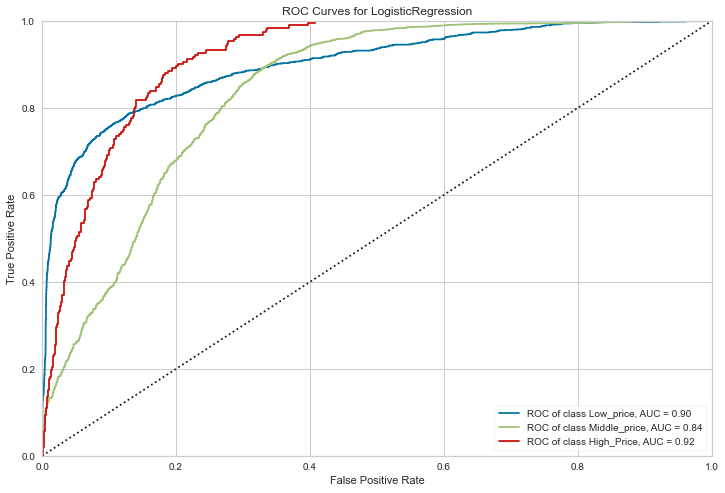

MODEL LEARNING CURVE


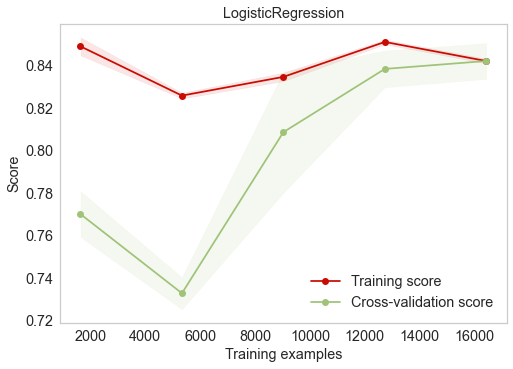

*************************************************** DecisionTreeRegressor ************************************************************


Accuracy_Score 0.8578995433789954


SCORE 0.8578995433789954


Confusion metrics


[[1070  319    3]
 [ 293 3517   81]
 [   1   81  110]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1392
           1       0.90      0.90      0.90      3891
           2       0.57      0.57      0.57       192

    accuracy                           0.86      5475
   macro avg       0.75      0.75      0.75      5475
weighted avg       0.86      0.86      0.86      5475

Cross_Val_Score 0.868485129776496


ROC AUC CURVE


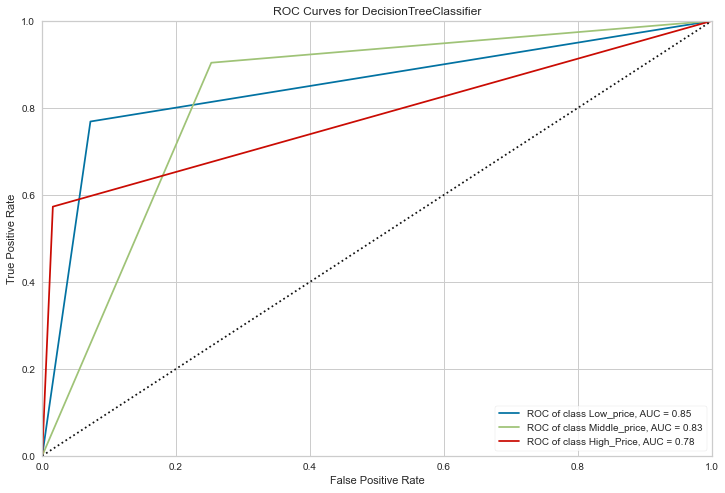

MODEL LEARNING CURVE


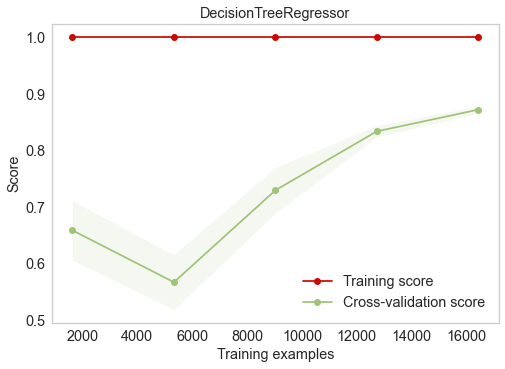

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.9073972602739726


SCORE 0.9073972602739726


Confusion metrics


[[1156  236    0]
 [ 156 3720   15]
 [   1   99   92]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1392
           1       0.92      0.96      0.94      3891
           2       0.86      0.48      0.62       192

    accuracy                           0.91      5475
   macro avg       0.89      0.76      0.80      5475
weighted avg       0.91      0.91      0.90      5475

Cross_Val_Score 0.9131465693342946


ROC AUC CURVE


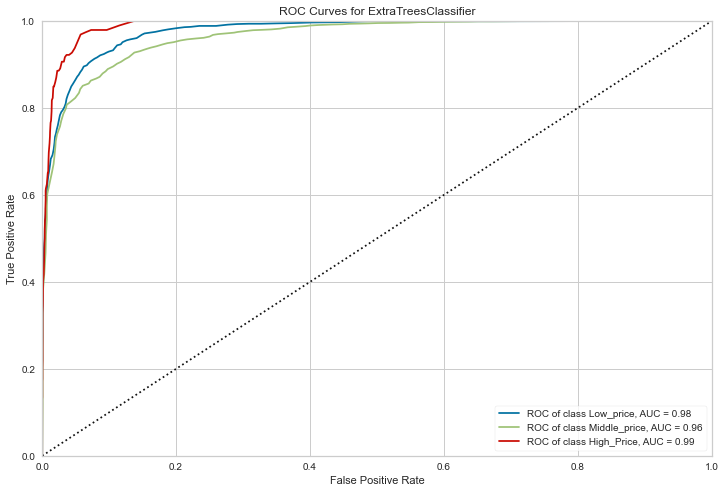

MODEL LEARNING CURVE


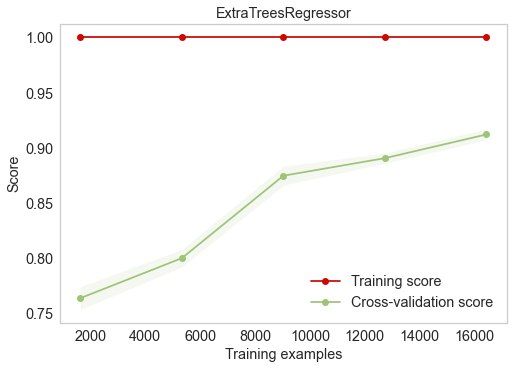

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.9092237442922374


SCORE 0.9092237442922374


Confusion metrics


[[1145  247    0]
 [ 141 3744    6]
 [   0  103   89]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1392
           1       0.91      0.96      0.94      3891
           2       0.94      0.46      0.62       192

    accuracy                           0.91      5475
   macro avg       0.91      0.75      0.80      5475
weighted avg       0.91      0.91      0.91      5475

Cross_Val_Score 0.9142966234078346


ROC AUC CURVE


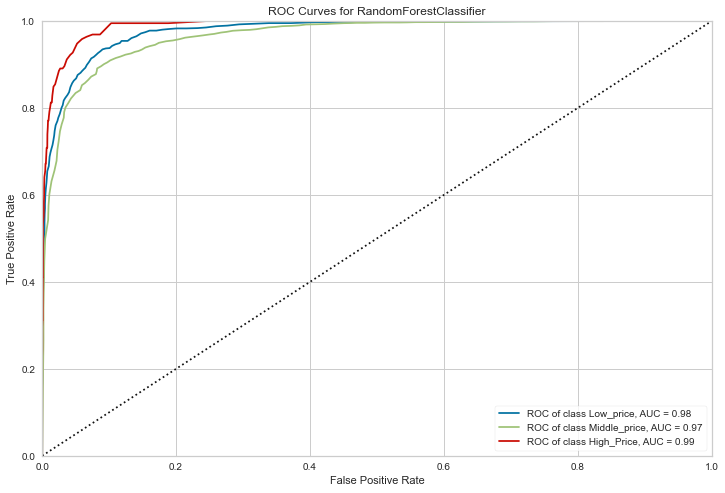

MODEL LEARNING CURVE


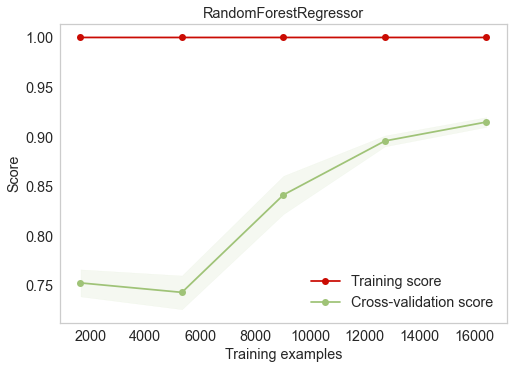

*************************************************** XGBRegressor ************************************************************
[03:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.9198173515981735


SCORE 0.9198173515981735


Confusion metrics


[[1190  202    0]
 [ 136 3735   20]
 [   0   81  111]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1392
           1       0.93      0.96      0.94      3891
           2       0.85      0.58      0.69       192

    accuracy                           0.92      5475
   macro avg       0.89      0.80      0.84      5475
weighted avg       0.92      0.92      0.92      5475

[03:37:08] WARNING

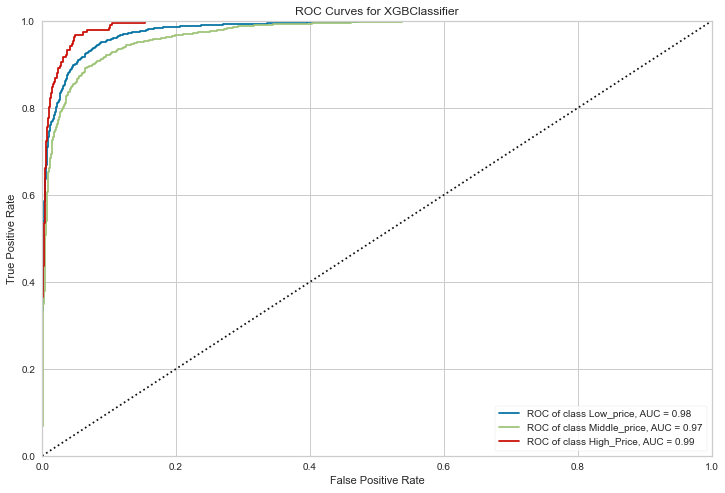

MODEL LEARNING CURVE
[03:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:42] WARNING: C:/Users/Administrator/wor

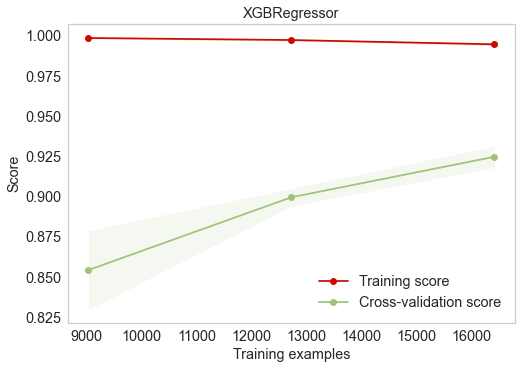

*************************************************** KNeighborsRegressor ************************************************************


Accuracy_Score 0.8414611872146118


SCORE 0.8414611872146118


Confusion metrics


[[ 980  412    0]
 [ 302 3559   30]
 [   1  123   68]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1392
           1       0.87      0.91      0.89      3891
           2       0.69      0.35      0.47       192

    accuracy                           0.84      5475
   macro avg       0.78      0.66      0.70      5475
weighted avg       0.84      0.84      0.84      5475

Cross_Val_Score 0.8435536529680364


ROC AUC CURVE


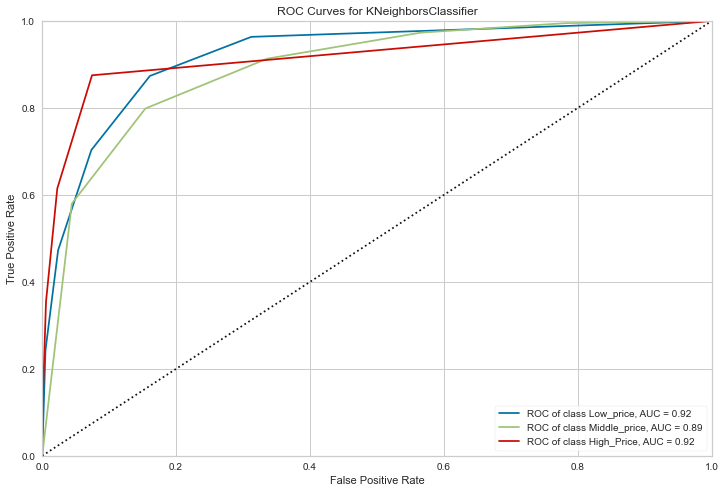

MODEL LEARNING CURVE


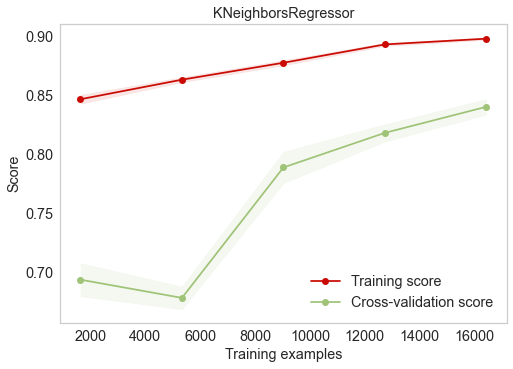

In [249]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
    print("***************************************************",name,"************************************************************")
    MODEL.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('\n')
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print('\n')
    print("SCORE",model.score(X_test,y_test))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print('\n')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print('\n')
    print(report)
    csv=cross_val_score(model,X_new,y,cv=skf).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print('\n')
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Low_price','Middle_price','High_Price'],micro=False,macro=False)
    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,X_new,y,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

choosing Extratrees as it gives good metrics score as compare to others.

In [250]:
ETree=ExtraTreesClassifier()
ETree.fit(X_train,y_train)

ExtraTreesClassifier()

In [251]:
ETree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyperparameter Tuning

In [252]:
param={'bootstrap':[False,True],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3,4],
 'max_leaf_nodes': [None,1,2,3],
 'max_samples': [None,1,2],
 'max_features': ['auto','sqrt','log2']
 }

In [253]:
grid=GridSearchCV(estimator=ETree,param_grid=param,cv=skf,n_jobs=-1)

In [255]:
grid.fit(X_new,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 1, 2, 3],
                         'max_samples': [None, 1, 2]})

In [256]:
grid.best_score_

0.9133653268445086

In [257]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': 1}

In [258]:
final_model=ExtraTreesClassifier(bootstrap= False,
 criterion= 'gini',
 max_depth= None,
 max_features= 'log2',
 max_leaf_nodes= None)

In [259]:
new_csv=cross_val_score(final_model,X_new,y,cv=skf,scoring='accuracy').mean()
new_csv

0.9123789353520788

In [260]:
final_model.fit(X_train,y_train)

ExtraTreesClassifier(max_features='log2')

In [261]:
y_pred1=final_model.predict(X_test)

Final model learning curve and roc_auc score

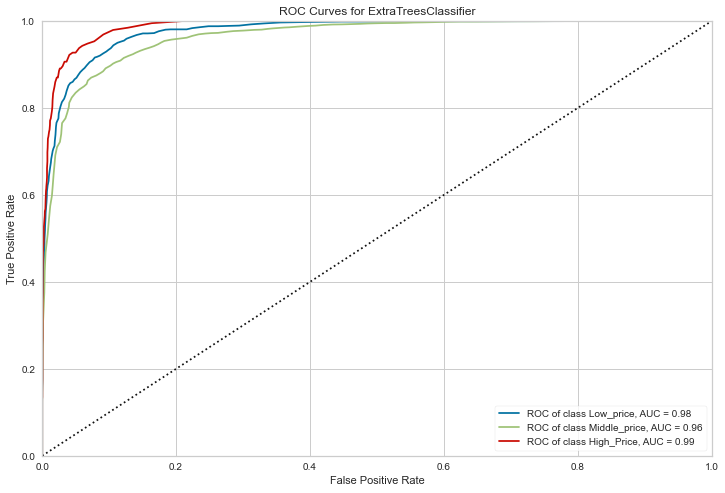

MODEL LEARNING CURVE


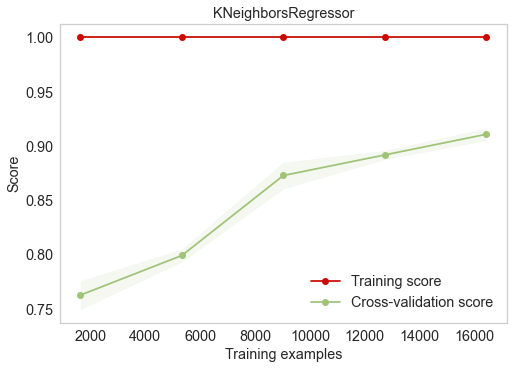

In [263]:
plt.figure(figsize=(12,8))
roc_auc(final_model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Low_price','Middle_price','High_Price'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(final_model,X_new,y,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

Final model metrics

In [264]:
print("Model_accuracy",accuracy_score(y_test,y_pred1))
print("Confusion_metrics")
print(confusion_matrix(y_test,y_pred1))
print("classification_report")
print('\n')
print(classification_report(y_test,y_pred1))

Model_accuracy 0.9121461187214612
Confusion_metrics
[[1169  223    0]
 [ 151 3727   13]
 [   0   94   98]]
classification_report


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1392
           1       0.92      0.96      0.94      3891
           2       0.88      0.51      0.65       192

    accuracy                           0.91      5475
   macro avg       0.90      0.77      0.82      5475
weighted avg       0.91      0.91      0.91      5475



Saving the grid search cv as my final model

In [265]:
import joblib
joblib.dump(grid,'avacadoproject.obj')

['avacadoproject.obj']

In [267]:
model=joblib.load('avacadoproject.obj')

In [268]:
y_preds=model.predict(X_test)

In [269]:
y_preds

array([0, 0, 1, ..., 2, 1, 1], dtype=int64)

Conclusion


In this data the target variable was having 240 approx unique values and the size of data was 18249 as rows so that mean my target column is not continous variable so i converted it into three bins low,average and high.

Did EDA to understand the importance of features and also did feature engineering where added 5 new features and at the time of checking correlation, it was found that many columns have high correlation with each other so dropped some of them.

Trained multiple model but extratrees was giving good accuracy and performance metrics so did hyperparameter tuning of that only.

At the end, build a model that can predict the average price of avacado with 91% cross val score accuracy.